In [23]:
!pip install flake8 pycodestyle_magic
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
pd.set_option("display.max_rows", 101)
pd.options.display.max_columns = 999
import warnings
from datetime import timedelta
from tqdm import tqdm
warnings.filterwarnings("ignore")

  Using cached pycodestyle-2.7.0-py2.py3-none-any.whl (41 kB)
  Attempting uninstall: pycodestyle
    Found existing installation: pycodestyle 2.6.0


ERROR: Error while checking for conflicts. Please file an issue on pip's issue tracker: https://github.com/pypa/pip/issues/new
Traceback (most recent call last):
  File "C:\Users\Nordine\anaconda3\lib\site-packages\pip\_vendor\pkg_resources\__init__.py", line 3021, in _dep_map
    return self.__dep_map
  File "C:\Users\Nordine\anaconda3\lib\site-packages\pip\_vendor\pkg_resources\__init__.py", line 2815, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Nordine\anaconda3\lib\site-packages\pip\_vendor\pkg_resources\__init__.py", line 3012, in _parsed_pkg_info
    return self._pkg_info
  File "C:\Users\Nordine\anaconda3\lib\site-packages\pip\_vendor\pkg_resources\__init__.py", line 2815, in __getattr__
    raise AttributeError(attr)
AttributeError: _pkg_info

During handling of the above exception, another exception occurred:

In [8]:
customers = pd.read_csv('C:\\Users\\Nordine\\Documents\\Projet5-Openclassrooms-master\\Projet5-Openclassrooms-master\\olist_customers_dataset.csv')
geolocalisation = pd.read_csv('C:\\Users\\Nordine\\Documents\\Projet5-Openclassrooms-master\\Projet5-Openclassrooms-master\\olist_geolocation_dataset.csv')
order_items = pd.read_csv('C:\\Users\\Nordine\\Documents\\Projet5-Openclassrooms-master\\Projet5-Openclassrooms-master\\olist_order_items_dataset.csv')
order_payments = pd.read_csv('C:\\Users\\Nordine\\Documents\\Projet5-Openclassrooms-master\\Projet5-Openclassrooms-master\\olist_order_payments_dataset.csv')
order_reviews = pd.read_csv('C:\\Users\\Nordine\\Documents\\Projet5-Openclassrooms-master\\Projet5-Openclassrooms-master\\olist_order_reviews_dataset.csv')
orders = pd.read_csv('C:\\Users\\Nordine\\Documents\\Projet5-Openclassrooms-master\\Projet5-Openclassrooms-master\\olist_orders_dataset.csv')
products = pd.read_csv('C:\\Users\\Nordine\\Documents\\Projet5-Openclassrooms-master\\Projet5-Openclassrooms-master\\olist_products_dataset.csv')
sellers = pd.read_csv('C:\\Users\\Nordine\\Documents\\Projet5-Openclassrooms-master\\Projet5-Openclassrooms-master\\olist_sellers_dataset.csv')
translation = pd.read_csv('C:\\Users\\Nordine\\Documents\\Projet5-Openclassrooms-master\\Projet5-Openclassrooms-master\\product_category_name_translation.csv')

In [478]:
liste_df = [(customers, 'customers'), 
            (geolocalisation, 'geolocalisation'),
            (order_items, 'order_items'),
            (order_payments, 'order_payments'),
           (order_reviews, 'order_reviews'),
            (orders, 'orders'),
             (products, 'products'),
            (sellers, 'sellers'),
            (translation, 'translation')]

In [34]:
for df, name in liste_df :
    print(f'{name:-<20}{df.shape}')
   

customers-----------(99441, 5)
geolocalisation-----(1000163, 5)
order_items---------(112650, 7)
order_payments------(103886, 5)
order_reviews-------(99224, 7)
orders--------------(99441, 8)
products------------(32951, 9)
sellers-------------(3095, 4)
translation---------(71, 2)


Le fichier client est le fichier principal. Regardons les champs en communs avec les autres fichiers. Ces champs seront des candidats pour le merge.

In [35]:
# Commençons par éliminer les préfixes  des noms de colonnes
customers_col = []
geolocalisations_col = []
order_items_col = []
order_payments_col = []
order_reviews_col = []
orders_col = []
products_col = []
sellers_col = []
translation_col = []
dict = [ (geolocalisation , geolocalisations_col),
         (order_items , order_items_col),
       (order_payments , order_payments_col),
        (order_reviews , order_reviews_col),
        (orders , orders_col),
        (products , products_col),
        (sellers , sellers_col),
        (translation , translation_col)]
for col in customers:
    customers_col.append(col.split('_', maxsplit = 1)[1])
for df, colList in dict :    
    for col in df.columns:       
        if '_' in col:
            colList.append(col.split('_', maxsplit = 1)[1])
           
        else:
             colList.append(col)
        
    


In [68]:
def var_name(var):
    for name,value in globals().items() :
        if value is var :
            return name
    return '?????'

common_cols = {}
for df, colList in dict:
    colonnes = []  
    for col in customers_col:        
        if col in colList:
            colonnes.append(col)
    common_cols[var_name(df)] = colonnes
    


In [69]:
common_cols

{'geolocalisation': ['zip_code_prefix', 'city', 'state'],
 'order_items': ['id'],
 'order_payments': ['id'],
 'order_reviews': ['id'],
 'orders': ['id'],
 'products': ['id'],
 'sellers': ['id', 'zip_code_prefix', 'city', 'state'],
 'translation': []}

In [71]:
customers.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state'],
      dtype='object')

In [77]:
order_items.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value'],
      dtype='object')

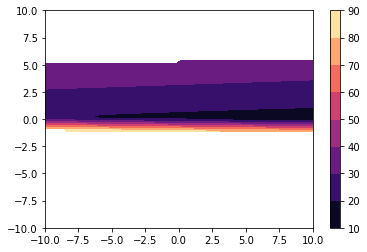

In [453]:
# Cellule 'brouillon'
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=0)
X[:,1] = X[:,1] * 100

y = y.reshape(y.shape[0], 1)


lim = 10
h =100
W1 = np.linspace(-lim, lim, h)
W2 = np.linspace(-lim, lim, h)

W11, W22 = np.meshgrid(W1, W2)

W = np.c_[W11.ravel(), W22.ravel()].T

b =0 
Z = X.dot(W) + b

A = 1 / (1+np.exp(-Z))

A.shape

epsilon = 1e-15

L = 1 / len(y) * np.sum(-y * np.log(A * epsilon) - (1 -y) * np.log(1 - A * epsilon), axis=0).reshape(W11.shape)

plt.contourf(W11, W22, L, cmap='magma')

plt.colorbar()

In [80]:
for df, name in liste_df:
    print(f'{name:-<20}{df.isna().sum().sum()/df.shape[0]/df.shape[1]}')

customers-----------0.0
geolocalisation-----0.0
order_items---------0.0
order_payments------0.0
order_reviews-------0.21006294560071873
orders--------------0.00616948743476031
products------------0.008254681193287003
sellers-------------0.0
translation---------0.0


In [456]:
a = pd.merge(orders, customers)
a[a['customer_unique_id'] == '7c396fd4830fd04220f754e42b4e5bff']

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
62147,69923a4e07ce446644394df37a710286,31f31efcb333fcbad2b1371c8cf0fa84,delivered,2017-09-04 11:26:38,2017-09-04 11:43:25,2017-09-04 21:22:15,2017-09-05 19:20:20,2017-09-15,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP


On a beaucoup de NaN sur le fichier order_reviews. Les fichiers orders et products contiennent peu de Nan. Le reste sont complets.

In [81]:
order_reviews.isna().sum(axis=0)

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

Les NaN correspondent à l'absene de messages lors des notations.

In [82]:
orders.isna().sum(axis=0)

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [124]:
orders[orders['order_delivered_customer_date'].isna()]['order_status'].value_counts()

shipped        1107
canceled        619
unavailable     609
invoiced        314
processing      301
delivered         8
created           5
approved          2
Name: order_status, dtype: int64

In [95]:
products.isna().sum(axis=0)

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

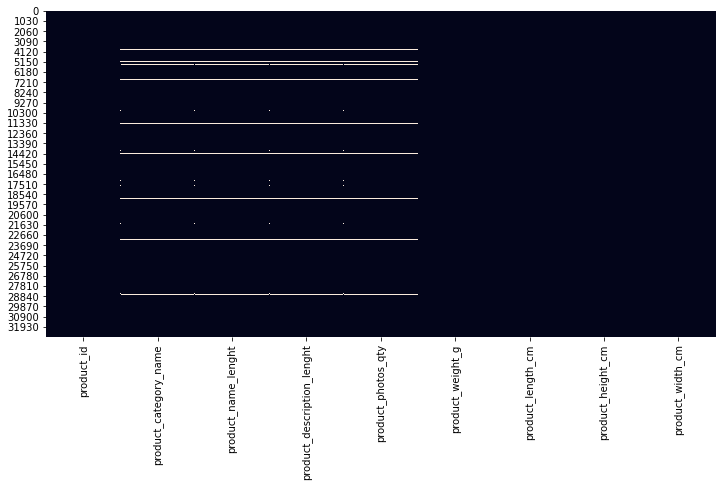

In [98]:
plt.figure(figsize=(12,6))
sns.heatmap(products.isna(), cbar=False)
plt.show()

In [113]:
orders['order_delivered_carrier_date']

0        2017-10-04 19:55:00
1        2018-07-26 14:31:00
2        2018-08-08 13:50:00
3        2017-11-22 13:39:59
4        2018-02-14 19:46:34
                ...         
99436    2017-03-10 11:18:03
99437    2018-02-07 23:22:42
99438    2017-08-28 20:52:26
99439    2018-01-12 15:35:03
99440    2018-03-09 22:11:59
Name: order_delivered_carrier_date, Length: 99441, dtype: object

In [531]:
geolocalisation[geolocalisation['geolocation_state'] == 'RR']

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
777226,69313,2.817595,-60.728699,boa vista,RR
777227,69306,2.833882,-60.669115,boa vista,RR
777228,69310,2.836008,-60.711580,boa vista,RR
777229,69314,2.815559,-60.737210,boa vista,RR
777230,69301,2.814077,-60.669130,boa vista,RR
...,...,...,...,...,...
777867,69316,2.765127,-60.735404,boa vista,RR
777868,69378,0.880792,-59.696035,caroebe,RR
777869,69309,2.809871,-60.702822,boa vista,RR
777870,69373,0.935138,-60.427393,rorainopolis,RR


### Type de données

In [101]:
i=0
liste_indices = []
liste_colonnes = []
liste_types = []
liste_uniques = []

for df, name in liste_df:

    for column in df.columns:
        liste_indices.append(name)
        liste_colonnes.append(column)
        liste_types.append(df[column].dtype)
        liste_uniques.append(df[column].nunique())
    i+=1
resume_data = pd.DataFrame([liste_indices, 
                            liste_colonnes, 
                            liste_types, 
                            liste_uniques]
                          ).T
resume_data.columns=['Donnees', 'Nom colonne', 'Type', 'valeurs uniques']
resume_data

,Donnees,Nom colonne,Type,valeurs uniques
0,customers,customer_id,object,99441
1,customers,customer_unique_id,object,96096
2,customers,customer_zip_code_prefix,int64,14994
3,customers,customer_city,object,4119
4,customers,customer_state,object,27
5,geolocalisation,geolocation_zip_code_prefix,int64,19015
6,geolocalisation,geolocation_lat,float64,717360
7,geolocalisation,geolocation_lng,float64,717613
8,geolocalisation,geolocation_city,object,8011
9,geolocalisation,geolocation_state,object,27


Observations:
* customers
     * davantage de valeurs différentes pour customer_id que customer_unique_id. Différence entre les deux?
     * customer_state pourrait être de type catégorielle
* geolocalisation
    * plus de villes que dans la base de données customers :
    * geolocation_state pourrait être de type catégorielle
* order_items
    * order_item_id contient 21 différentes valeurs. Visiblement le fichier contient tous les items par order
    * autant de seller_id que dans la base de données sellers
    * shipping_limit_date : à mettre en format date
* order_payments :
    * order_id contient autant de valeurs que dans order
    * payment_sequential et payment_type pourraient être de type catégorielle
* orders 
    * order_purchase_timestamp : à mettre en format date
    * order_approved_at :  à mettre en format date
    * order_delivered_carrier_date :  à mettre en format date
    * order_delivered_customer_date :  à mettre en format date
    * order_estimated_delivery_date :  à mettre en format date
* products:
    * 74 catégories cifférentes
* sellers: 
    * seller_state pourrait être de type catégorielle
* translation : 3 catégories non traduites

In [110]:
order_item_gpby = order_items.groupby('order_id').count().reset_index()
order_item_gpby[order_item_gpby['order_item_id'] > 1]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
13,0008288aa423d2a3f00fcb17cd7d8719,2,2,2,2,2,2
31,00143d0f86d6fbd9f9b38ab440ac16f5,3,3,3,3,3,3
39,001ab0a7578dd66cd4b0a71f5b6e1e41,3,3,3,3,3,3
43,001d8f0e34a38c37f7dba2a37d4eba8b,2,2,2,2,2,2
69,002c9def9c9b951b1bec6d50753c9891,2,2,2,2,2,2
...,...,...,...,...,...,...,...
98603,ffd84ab39cd5e873d8dba24342e65c01,2,2,2,2,2,2
98626,ffe4b41e99d39f0b837a239110260530,2,2,2,2,2,2
98637,ffecd5a79a0084f6a592288c67e3c298,3,3,3,3,3,3
98654,fff8287bbae429a99bb7e8c21d151c41,2,2,2,2,2,2


In [111]:
order_items[order_items['order_id'] == '00143d0f86d6fbd9f9b38ab440ac16f5']

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
32,00143d0f86d6fbd9f9b38ab440ac16f5,1,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.1
33,00143d0f86d6fbd9f9b38ab440ac16f5,2,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.1
34,00143d0f86d6fbd9f9b38ab440ac16f5,3,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.1


### Redéfinition des types

#### Dates

In [9]:
def redefine_date(orders, order_items):
    order_items['shipping_limit_date'] = order_items[
        'shipping_limit_date'].astype('datetime64')
    orders['order_purchase_timestamp'] = orders[
        'order_purchase_timestamp'].astype('datetime64')
    orders['order_approved_at'] = pd.to_datetime(orders[
        'order_approved_at'], errors='coerce')
    orders['order_delivered_carrier_date'] = pd.to_datetime(
        orders['order_delivered_carrier_date'], errors='coerce')
    orders['order_delivered_customer_date'] = pd.to_datetime(
        orders['order_delivered_customer_date'], errors='coerce')
    orders['order_estimated_delivery_date'] = orders[
        'order_estimated_delivery_date'].astype('datetime64')
    return orders, order_items
orders, order_items = redefine_date(orders, order_items)

#### Recherche de variables catégorielles

In [134]:
def categorize_datas():
    for df, name in liste_df:
        for column in df.columns:              
            if df[column].nunique() < 50:
                df[column] = df[column].astype('category')

### Gestion des données dupliquées

In [293]:
for df, name in liste_df:
    print(name)

customers
geolocalisation
order_items
order_payments
order_reviews
orders
products
sellers
translation


In [299]:
a = customers.drop(columns='customer_unique_id')
a[a.duplicated()]

,customer_id,customer_zip_code_prefix,customer_city,customer_state


In [310]:
geolocalisation = geolocalisation.drop_duplicates()

In [311]:
order_items.duplicated().sum()

0

In [313]:
order_payments.duplicated().sum()

0

In [315]:
order_reviews.drop(columns =['review_id']).duplicated().sum()

0

In [317]:
orders.drop(columns=['order_id']).duplicated().sum()

0

In [322]:
products.duplicated().sum()

0

In [324]:
sellers.duplicated().sum()

0

In [325]:
translation.duplicated().sum()

0

Renommons la colonne customer_id en order_id et customer_unique_id en customer_id pour le merge. Vérifions tout d'abord que seul le dataset customers contient cette colonne:

In [326]:
for df, name in liste_df:
    for col in df.columns:
        if col == 'customer_unique_id':
            print(name)
    

customers


Regardons maintenant dans quel dataset on trouve une colonne 'customer_id' pour voir si le contenu est cohérent avec l'identifiant unique du client

In [327]:
for df, name in liste_df:
    for col in df.columns:
        if col == 'customer_id':
            print(name)

customers
orders


In [446]:
customers['customer_unique_id'].nunique()

96096

En fait le customer_id correspond à la clef étrangère. On ne peut donc pas renommer la colonne

### Feature selection

In [10]:
customers = customers[['customer_state','customer_id', 'customer_unique_id']]
order_items.drop(columns=['freight_value'], inplace=True)
order_payments.drop(columns=['payment_sequential', 'payment_installments'], inplace=True)
order_reviews = order_reviews[['order_id', 'review_score']]
orders = orders[['order_id', 'customer_id', 'order_purchase_timestamp']]
products = pd.merge(products, translation)[['product_id', 'product_category_name_english']]
sellers = sellers[['seller_id', 'seller_state']]

In [445]:
#SP, Parana, Minas Gerais, District federal
geolocalisation[geolocalisation['geolocation_state'] == 'AP']


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
774255,68901,0.040253,-51.078577,macapa,AP
774256,68900,0.035899,-51.063500,macapa,AP
774257,68948,0.904797,-52.001581,serra do navio,AP
774258,68904,0.009135,-51.091531,macapa,AP
774259,68920,1.211469,-53.045751,laranjal do jari,AP
...,...,...,...,...,...
775103,68901,0.039131,-51.057793,macapa,AP
775104,68900,0.040493,-51.067793,macapa,AP
775105,68928,-0.024708,-51.179136,santana,AP
775106,68901,0.026479,-51.066432,macapa,AP


In [483]:
orders, order_items = redefine_date(orders, order_items)

In [280]:
order_items.duplicated().sum()

0

,order_id,payment_type,payment_value
3675,8ca5bdac5ebe8f2d6fc9171d5ebc906a,voucher,15.00
4829,59d02be1c50fb6e6930cafd6ff6a31e5,voucher,20.00
5091,4689b1816de42507a7d63a4617383c59,voucher,56.42
6940,cf101c3abd3c061ca9f78c1bbb1125af,voucher,8.46
7441,d744783ed2ace06cac647a9e64dcbcfd,voucher,1.47
...,...,...,...
102942,dbc097913df341f30b9f9e92f459cee2,voucher,50.00
103046,c5fd5386640ddd76adc482b72d24a02b,voucher,5.79
103216,4d9190887b47ff1b89c657c788c038f6,voucher,12.80
103551,1ea11b975aea60ca92fa0559184d3d34,voucher,12.69


In [285]:
order_payments[order_payments['order_id'] == '8ca5bdac5ebe8f2d6fc9171d5ebc906a']

,order_id,payment_type,payment_value
752,8ca5bdac5ebe8f2d6fc9171d5ebc906a,voucher,15.00
3675,8ca5bdac5ebe8f2d6fc9171d5ebc906a,voucher,15.00
8191,8ca5bdac5ebe8f2d6fc9171d5ebc906a,voucher,15.00
15778,8ca5bdac5ebe8f2d6fc9171d5ebc906a,voucher,15.00
37465,8ca5bdac5ebe8f2d6fc9171d5ebc906a,credit_card,59.08
49967,8ca5bdac5ebe8f2d6fc9171d5ebc906a,voucher,15.00
69644,8ca5bdac5ebe8f2d6fc9171d5ebc906a,voucher,15.00
78419,8ca5bdac5ebe8f2d6fc9171d5ebc906a,voucher,15.00
83047,8ca5bdac5ebe8f2d6fc9171d5ebc906a,voucher,25.00


### Traitement des NaN

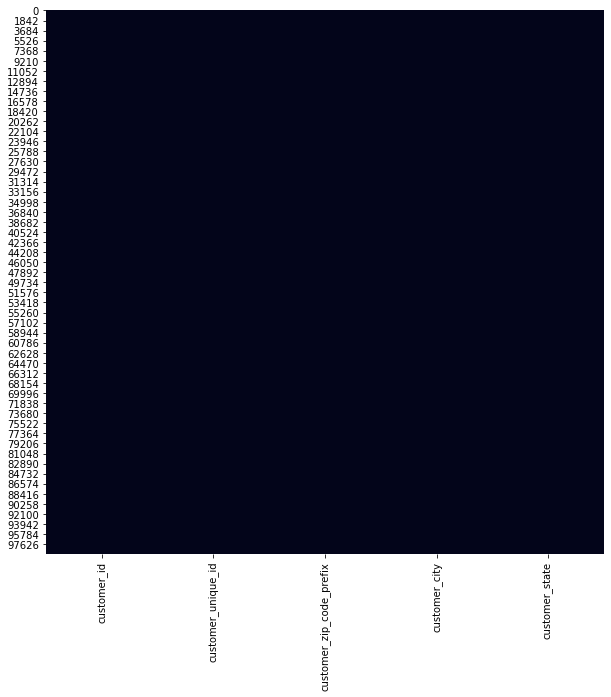

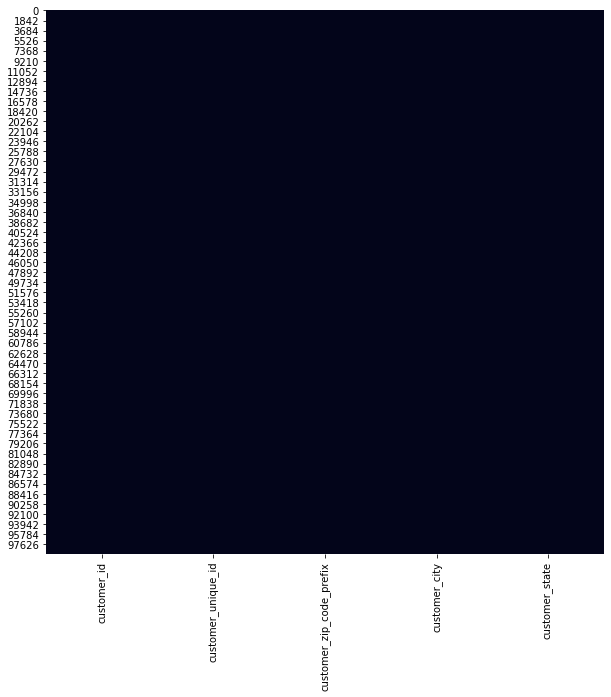

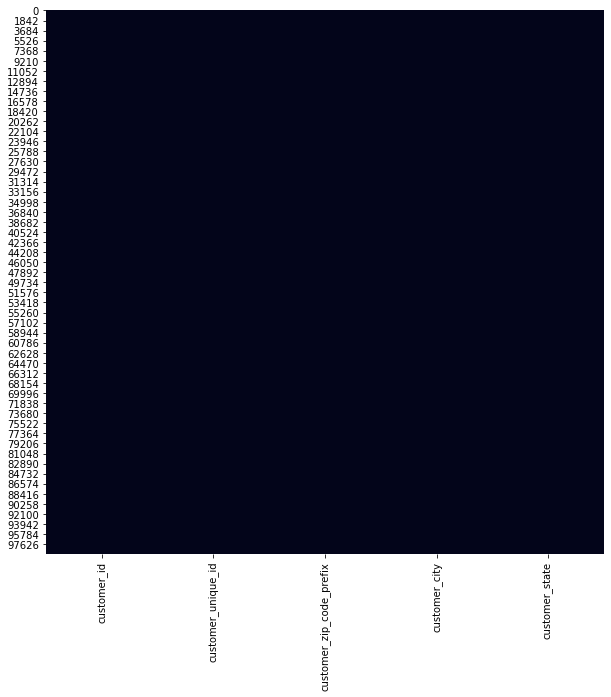

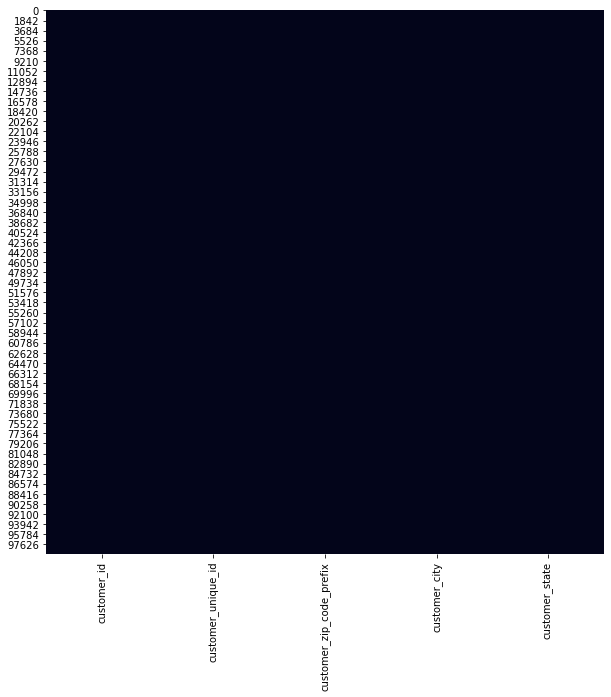

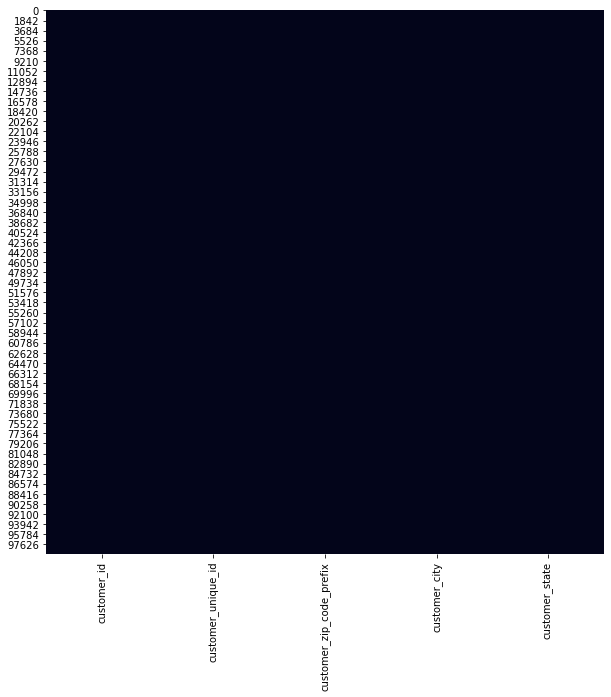

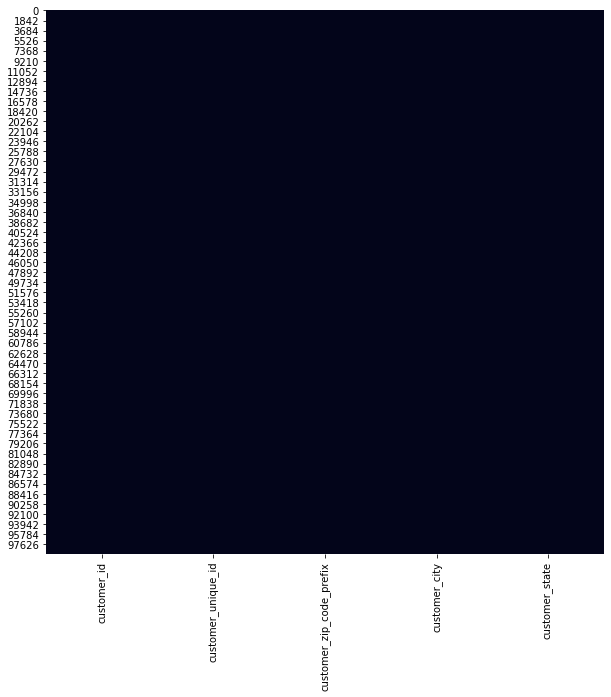

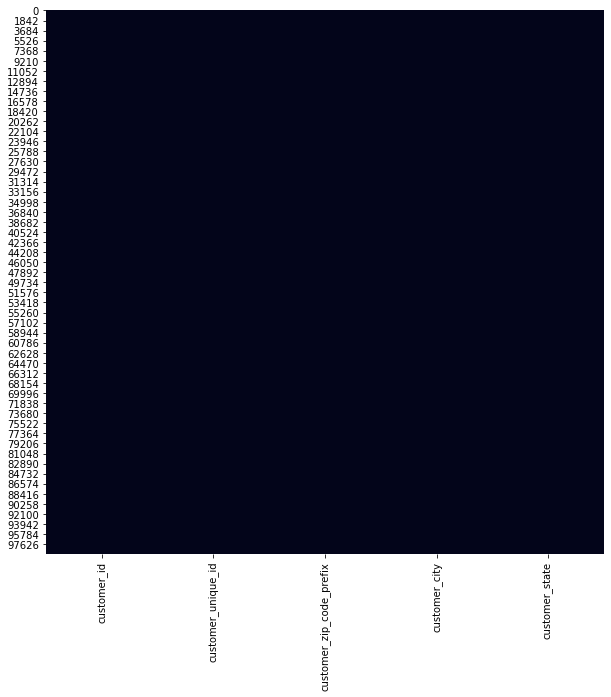

In [110]:
liste_df = [(customers, 'customers'),             
            (order_items, 'order_items'),
            (order_payments, 'order_payments'),
           (order_reviews, 'order_reviews'),
            (orders, 'orders'),
             (products, 'products'),
            (sellers, 'sellers'),
           ]

for df, name in liste_df:
    plt.figure(figsize=(10,10))
    sns.heatmap(customers.isna(), cbar= False)
    plt.show()

Nos données sont clean, on peut effectuer l'assemblage

In [535]:
MAX_MOINS_30J = orders['order_purchase_timestamp'].max() - timedelta(days=30)
MAX_MOINS_30J

Timestamp('2018-09-17 17:30:18')

In [533]:
orders['order_purchase_timestamp'].max()

Timestamp('2018-10-17 17:30:18')

In [537]:
orders[orders['order_purchase_timestamp'] < MAX_MOINS_30J].max()

order_id                         fffe41c64501cc87c801fd61db3f6244
customer_id                      ffffe8b65bbe3087b653a978c870db99
order_purchase_timestamp                      2018-09-17 17:21:16
order_approved_at                             2018-09-03 17:40:06
order_delivered_carrier_date                  2018-09-11 19:48:28
order_delivered_customer_date                 2018-10-17 13:22:46
order_estimated_delivery_date                 2018-10-25 00:00:00
dtype: object

### Segmentation RFM

In [22]:

orders['order_purchase_timestamp'].apply(lambda x: len([d for d in x]))  

TypeError: 'Timestamp' object is not iterable

,order_id,customer_id,order_purchase_timestamp
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:49
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,2017-11-18 19:28:06
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-13 21:18:39
12,82566a660a982b15fb86e904c8d32918,d3e3b74c766bc6214e0c830b17ee2341,2018-06-07 10:06:19
...,...,...,...
99431,b0f4af5c1b06e24fef510703bfe9f0a6,8e1ec396e317ff4c82a03ce16a0c3eb3,2017-10-27 15:21:00
99432,cfa78b997e329a5295b4ee6972c02979,a2f7428f0cafbc8e59f20e1444b67315,2017-12-20 09:52:41
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,2018-02-06 12:58:58
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,2018-01-08 21:28:27


In [ ]:
ordersWithCustomers = pd.merge(orders, customers)
from datetime import timedelta
NOW = orders['order_purchase_timestamp'].max() + timedelta(days=1)
ordersWithCustomers['DaysSinceOrder'] = ordersWithCustomers['order_purchase_timestamp'].apply(lambda x: (NOW - x).days)
aggr = {
    'DaysSinceOrder': lambda x: x.min(),  # the number of days since last order (Recency)
    'order_purchase_timestamp': lambda x: len([d for d in x if d >= NOW - timedelta(days=365)]), # the total number of orders in the last period (Frequency)
}
rfm = ordersWithCustomers.groupby('customer_unique_id').agg(aggr).reset_index()
totAchatParClient = pd.merge(customers, pd.merge(order_items, orders[orders['order_purchase_timestamp'] > NOW - timedelta(days=365)])).groupby('customer_unique_id').sum().reset_index()[['customer_unique_id', 'price']]

rfm = rfm.merge(totAchatParClient)
rfm.rename(columns={'DaysSinceOrder': 'Recency', 'order_purchase_timestamp': 'Frequency', 'price' : 'Monetary'}, inplace=True)
ordersWithCustomersWithPrices = pd.merge(ordersWithCustomers, order_items)
from tqdm import tqdm
tqdm.pandas()
#rfm['Monetary'] = rfm['customer_unique_id'].progress_apply(lambda x: ordersWithCustomersWithPrices[(ordersWithCustomersWithPrices['customer_unique_id'] == x) & \
#                                                          (ordersWithCustomersWithPrices['order_purchase_timestamp'] >= NOW - timedelta(days=365))]\
#                                                           ['price'].sum())
  
quintiles = rfm[['Recency', 'Frequency', 'Monetary']].quantile([.2, .4, .6, .8]).to_dict()
rfm['R_quartile'] = rfm['Recency'].progress_apply(lambda x: r_score(x))
rfm['F_quartile'] = rfm['Frequency'].progress_apply(lambda x: fm_score(x, 'Frequency'))
rfm['M_quartile'] = rfm['Monetary'].progress_apply(lambda x: fm_score(x, 'Monetary'))

rfm

In [508]:
from datetime import timedelta
NOW = orders['order_purchase_timestamp'].max() + timedelta(days=1)
NOW

Timestamp('2018-10-18 17:30:18')

In [509]:
ordersWithCustomers['DaysSinceOrder'] = ordersWithCustomers['order_purchase_timestamp'].apply(lambda x: (NOW - x).days)

In [510]:


aggr = {
    'DaysSinceOrder': lambda x: x.min(),  # the number of days since last order (Recency)
    'order_purchase_timestamp': lambda x: len([d for d in x if d >= NOW - timedelta(days=365)]), # the total number of orders in the last period (Frequency)
}
rfm = ordersWithCustomers.groupby('customer_unique_id').agg(aggr).reset_index()
rfm.rename(columns={'DaysSinceOrder': 'Recency', 'order_purchase_timestamp': 'Frequency'}, inplace=True)
rfm.head()

,customer_unique_id,Recency,Frequency
0,0000366f3b9a7992bf8c76cfdf3221e2,161,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,164,1
2,0000f46a3911fa3c0805444483337064,586,0
3,0000f6ccb0745a6a4b88665a16c9f078,370,0
4,0004aac84e0df4da2b147fca70cf8255,337,1


In [511]:
ordersWithCustomersWithPrices = pd.merge(ordersWithCustomers, order_items)
from tqdm import tqdm
tqdm.pandas()
totAchatParClient = pd.merge(customers, pd.merge(order_items, orders)).groupby('customer_unique_id').sum().reset_index()[['customer_unique_id', 'price']]

rfm.head()

100%|██████████| 96096/96096 [36:54<00:00, 43.40it/s]  


,customer_unique_id,Recency,Frequency,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,161,1,129.9
1,0000b849f77a49e4a4ce2b2a4ca5be3f,164,1,18.9
2,0000f46a3911fa3c0805444483337064,586,0,0.0
3,0000f6ccb0745a6a4b88665a16c9f078,370,0,0.0
4,0004aac84e0df4da2b147fca70cf8255,337,1,180.0


In [512]:
quintiles = rfm[['Recency', 'Frequency', 'Monetary']].quantile([.2, .4, .6, .8]).to_dict()
quintiles

{'Recency': {0.2: 143.0, 0.4: 228.0, 0.6: 318.0, 0.8: 434.0},
 'Frequency': {0.2: 0.0, 0.4: 1.0, 0.6: 1.0, 0.8: 1.0},
 'Monetary': {0.2: 0.0, 0.4: 29.99, 0.6: 74.89, 0.8: 140.9}}

In [513]:
def r_score(x):
    if x <= quintiles['Recency'][.2]:
        return 5
    elif x <= quintiles['Recency'][.4]:
        return 4
    elif x <= quintiles['Recency'][.6]:
        return 3
    elif x <= quintiles['Recency'][.8]:
        return 2
    else:
        return 1

def fm_score(x, c):
    if x <= quintiles[c][.2]:
        return 1
    elif x <= quintiles[c][.4]:
        return 2
    elif x <= quintiles[c][.6]:
        return 3
    elif x <= quintiles[c][.8]:
        return 4
    else:
        return 5    

In [514]:
rfm['R_quartile'] = rfm['Recency'].progress_apply(lambda x: r_score(x))
rfm['F_quartile'] = rfm['Frequency'].progress_apply(lambda x: fm_score(x, 'Frequency'))
rfm['M_quartile'] = rfm['Monetary'].progress_apply(lambda x: fm_score(x, 'Monetary'))

100%|██████████| 96096/96096 [00:00<00:00, 333672.62it/s]


In [528]:
#rfm['RFM_Segment'] = rfm.R_quartile.map(str)+rfm.F_quartile.map(str)+rfm.M_quartile.map(str)
#rfm['RFM_Score'] = rfm[['R_quartile','F_quartile','M_quartile']].sum(axis=1)
rfm

,customer_unique_id,Recency,Frequency,Monetary,R_quartile,F_quartile,M_quartile,RFM_Segment,RFM_Score
0,0000366f3b9a7992bf8c76cfdf3221e2,161,1,7.032321,4,1.584963,4,424,10
1,0000b849f77a49e4a4ce2b2a4ca5be3f,164,1,4.314697,4,1.584963,2,422,8
2,0000f46a3911fa3c0805444483337064,586,0,0.000000,1,1.000000,1,111,3
3,0000f6ccb0745a6a4b88665a16c9f078,370,0,0.000000,2,1.000000,1,211,4
4,0004aac84e0df4da2b147fca70cf8255,337,1,7.499846,2,1.584963,5,225,9
...,...,...,...,...,...,...,...,...,...
96091,fffcf5a5ff07b0908bd4e2dbc735a684,496,0,0.000000,1,1.000000,1,111,3
96092,fffea47cd6d3cc0a88bd621562a9d061,311,1,6.041988,3,1.584963,3,323,8
96093,ffff371b4d645b6ecea244b27531430a,618,0,0.000000,1,1.000000,1,111,3
96094,ffff5962728ec6157033ef9805bacc48,169,1,6.857981,4,1.584963,4,424,10


In [498]:
rfm.dtypes

customer_unique_id     object
Recency                 int64
Frequency               int64
Monetary              float64
R_quartile              int64
F_quartile              int64
M_quartile              int64
RFM_Segment            object
RFM_Score               int64
dtype: object

Recency-----------------------0.4454568667592305


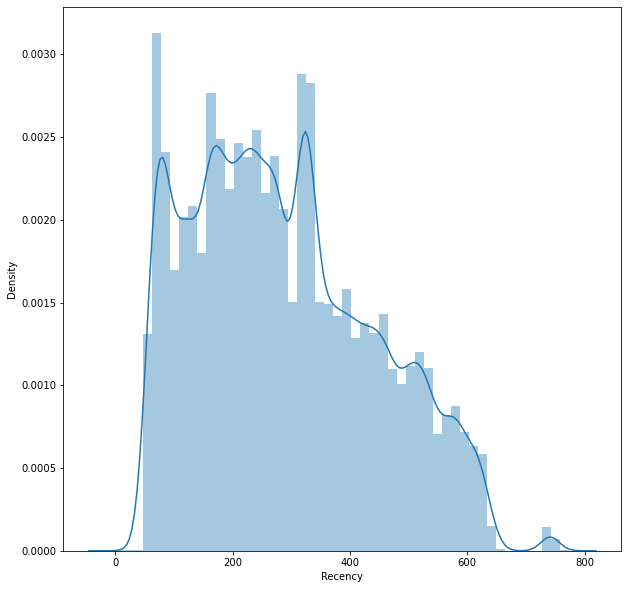

Frequency----------------------0.22325170653324194


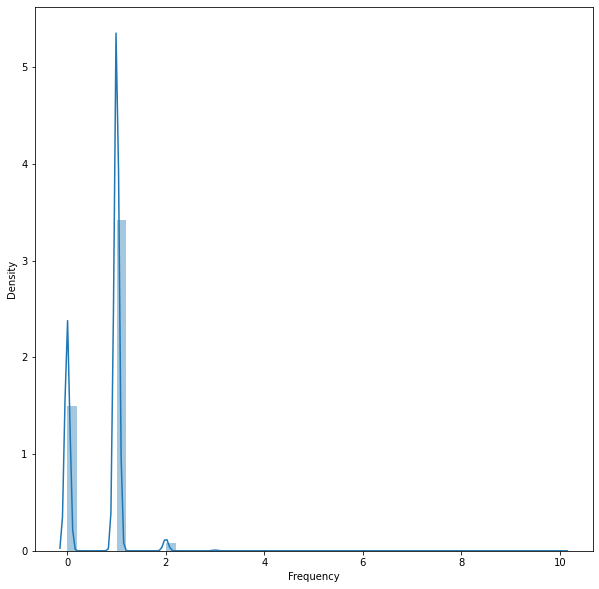

Monetary----------------------7.821974147762475


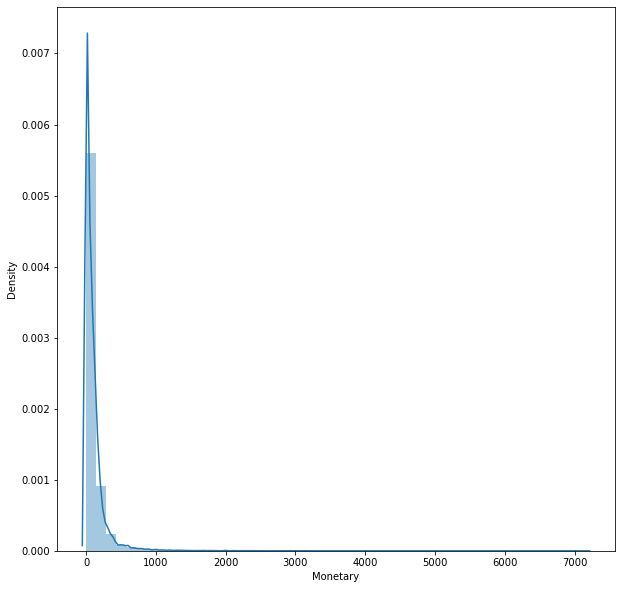

R_quartile---------------------0.002841637169589852


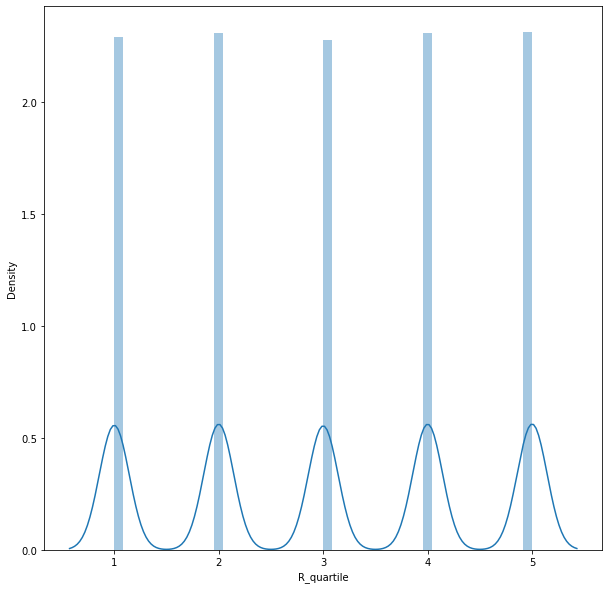

F_quartile--------------------1.914032191274299


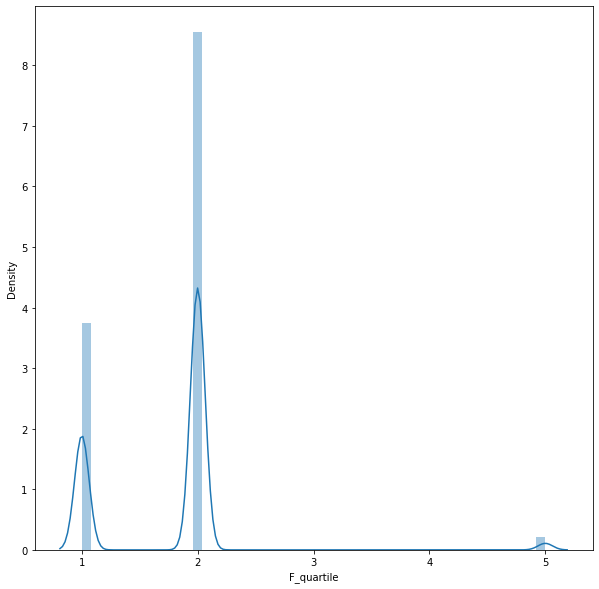

M_quartile--------------------0.006373353135333164


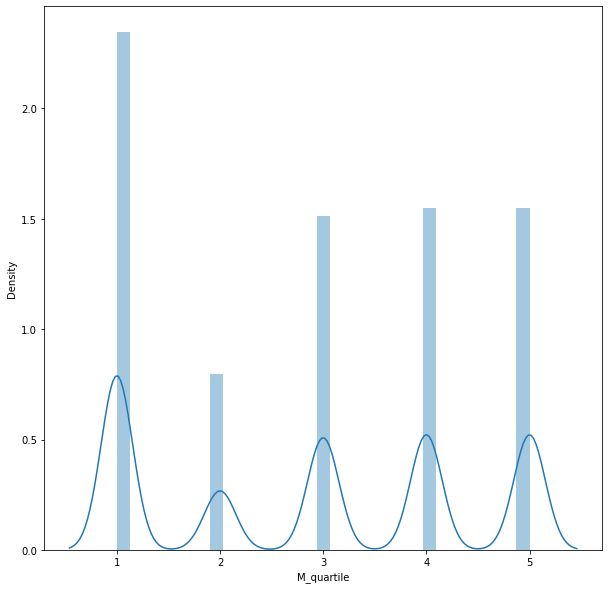

RFM_Score----------------------0.33110646501919233


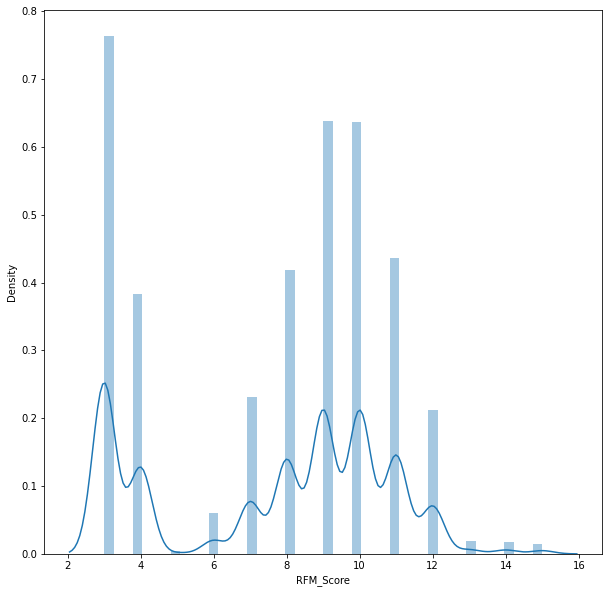

In [516]:
highSkewnessList = []
for col in rfm.select_dtypes(['int64', 'float64']).columns:
    skewness = rfm[col].skew()
    if skewness > 1:
        highSkewnessList.append(col)
    

In [517]:
for col in highSkewnessList:
    rfm[col] = np.log2(1 + rfm[col])

Recency-----------------------0.4454568667592305


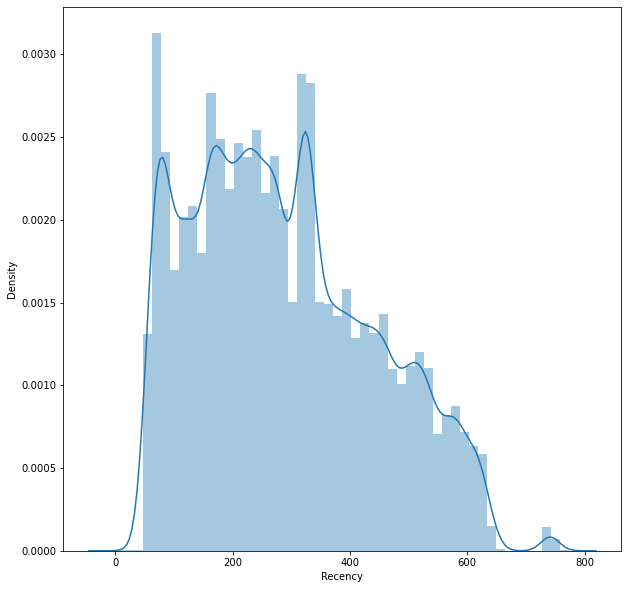

Frequency----------------------0.22325170653324194


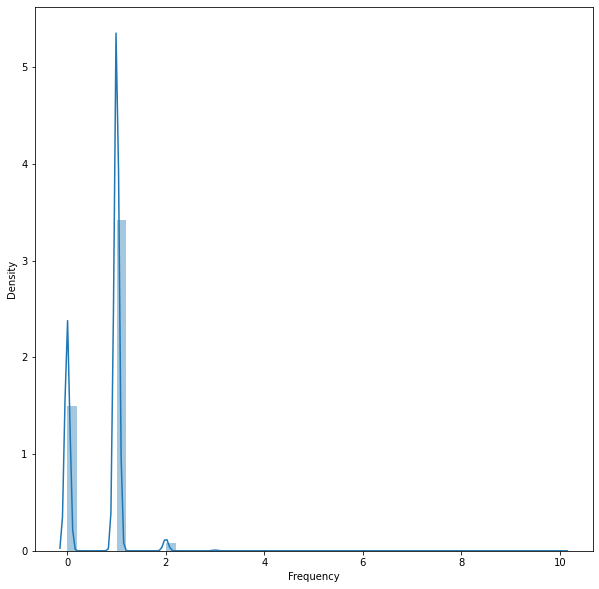

Monetary-----------------------0.4680420552927696


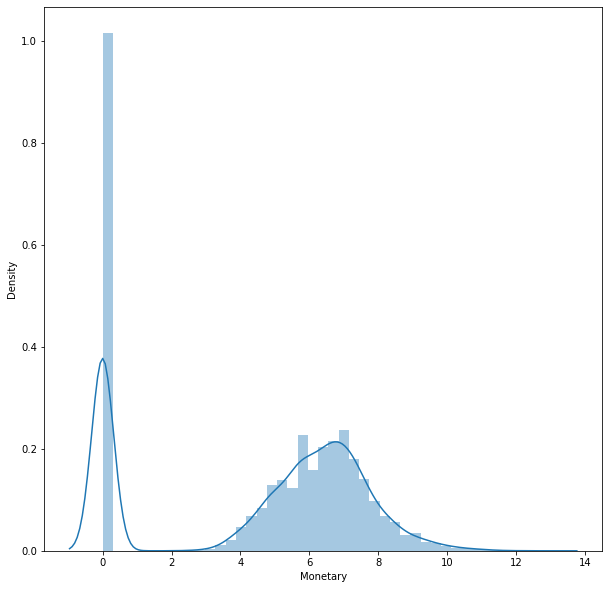

R_quartile---------------------0.002841637169589852


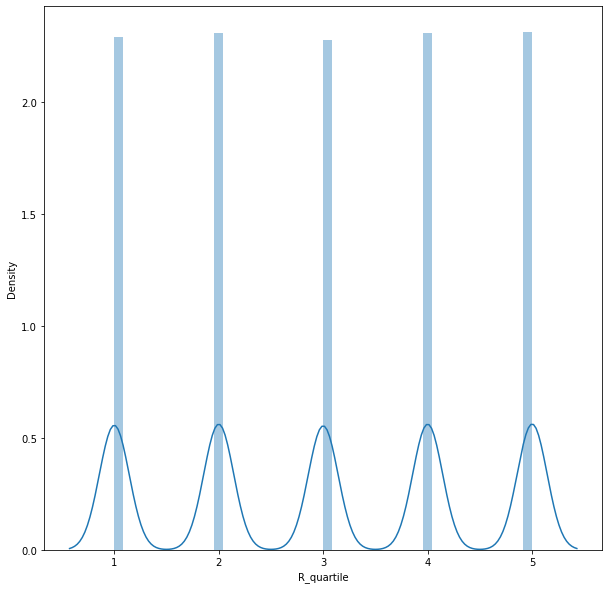

F_quartile--------------------0.20432622575928028


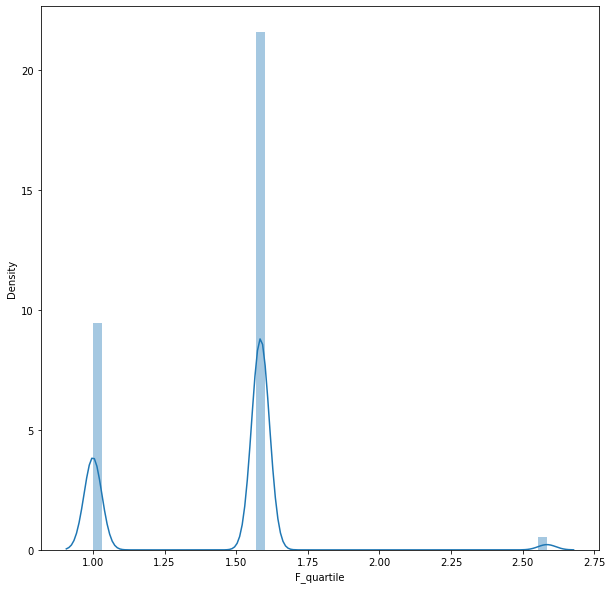

M_quartile--------------------0.006373353135333164


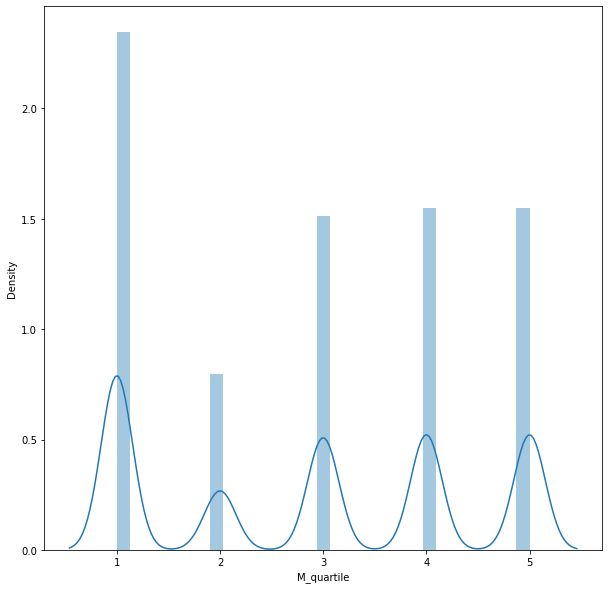

RFM_Score----------------------0.33110646501919233


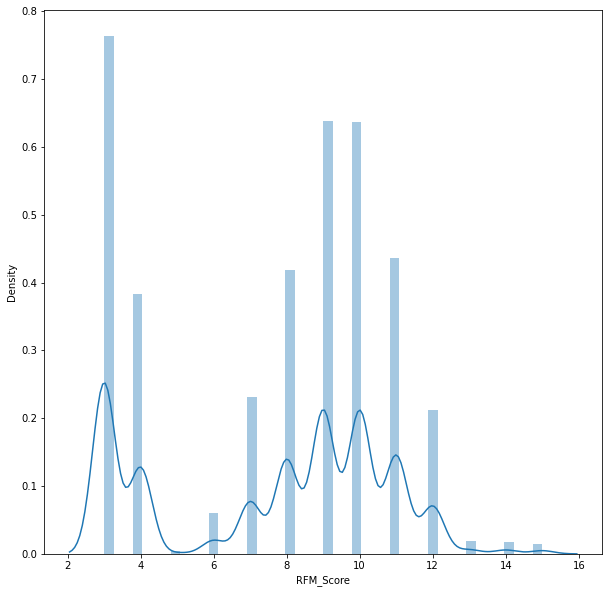

In [518]:
for col in rfm.select_dtypes(['int64', 'float64']).columns:
    skewness = rfm[col].skew()
    print(f'{col:-<30}{skewness}')
    plt.figure(figsize=(10,10))
    sns.distplot(rfm[col])
    plt.show()

### Assemblage

Achats total par client

In [337]:

customers, order_items, order_payments, order_reviews, orders, products, sellers = \
    feature_selection(customers, order_items, order_payments, order_reviews, orders, products, sellers)


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,1,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,1,ccb4503d9d43d245d3b295d0544f988b,527801b552d0077ffd170872eb49683b,2018-04-12 16:08:45,74.90,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25 00:00:00
112646,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,1,9ede6b0570a75a4b9de4f383329f99ee,3fd1e727ba94cfe122d165e176ce7967,2018-04-10 08:35:12,114.90,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20 00:00:00
112647,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,1,7a5d2e1e131a860ae7d18f6fffa9d689,d9e7e7778b32987280a6f2cb9a39c57d,2018-04-12 20:30:03,37.00,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,2018-05-09 19:03:15,2018-05-02 00:00:00
112648,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,1,f819f0c84a64f02d3a5606ca95edd272,4869f7a5dfa277a7dca6462dcf3b52b2,2017-11-09 21:15:51,689.00,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,2017-11-16 19:58:39,2017-12-05 00:00:00


In [339]:
totAchatParClient = pd.merge(customers, pd.merge(order_items, orders)).groupby('customer_unique_id').sum().reset_index()[['customer_unique_id', 'price']]
totAchatParClient['customer_unique_id'].duplicated().sum()

0

Catégorie la plus achetée par client

In [347]:
produitsParClient = pd.merge(customers, pd.merge(orders, pd.merge(order_items, products)))
produitsPlusAchetee = produitsParClient.groupby('customer_unique_id')['product_category_name_english'].agg(lambda x:x.value_counts().index[0]).reset_index(name='categorie')
produitsPlusAchetee['customer_unique_id'].duplicated().sum()


0

In [348]:
produitsPlusAchetee

,customer_unique_id,categorie
0,0000366f3b9a7992bf8c76cfdf3221e2,bed_bath_table
1,0000b849f77a49e4a4ce2b2a4ca5be3f,health_beauty
2,0000f46a3911fa3c0805444483337064,stationery
3,0000f6ccb0745a6a4b88665a16c9f078,telephony
4,0004aac84e0df4da2b147fca70cf8255,telephony
...,...,...
94083,fffcf5a5ff07b0908bd4e2dbc735a684,health_beauty
94084,fffea47cd6d3cc0a88bd621562a9d061,baby
94085,ffff371b4d645b6ecea244b27531430a,auto
94086,ffff5962728ec6157033ef9805bacc48,watches_gifts


Nombre de produits par client

In [449]:
nbreProdParClients = pd.merge(customers, pd.merge(orders, order_items)).groupby('customer_unique_id')['product_id'].count().reset_index(name='nbProds')
nbreProdParClients['nbProds'].value_counts()

1     83551
2      8996
3      1672
4       632
5       254
6       198
7        46
8        16
10       11
11       11
9        11
12        9
14        3
13        2
15        2
20        2
16        1
18        1
21        1
24        1
Name: nbProds, dtype: int64

Score moyen par client 

In [350]:
order_reviews['review_score'] = order_reviews['review_score'].astype('int32')
score_moy = pd.merge(customers, pd.merge(orders, order_reviews)).groupby('customer_unique_id')['review_score'].mean().reset_index(name='score_moy')
score_moy['customer_unique_id'].duplicated().sum()

0

Moyen de paiement le plus utilisé

In [351]:
paiement = pd.merge(customers, pd.merge(orders, order_payments)).groupby('customer_unique_id')['payment_type'].agg(lambda x:x.value_counts().index[0]).reset_index(name='paiement')
paiement['customer_unique_id'].duplicated().sum()

0

In [416]:

#orders, order_items = redefine_date(orders, order_items)
delai_delivery = pd.merge(orders, order_items)

delai_delivery['Delai_livraison_Commande'] = delai_delivery['order_delivered_customer_date'] - delai_delivery[
       'order_purchase_timestamp']
delai_delivery['Delai_livraison_Commande'] = delai_delivery['Delai_livraison_Commande'].dt.days

delai_delivery = pd.merge(customers[['customer_id', 'customer_unique_id']], delai_delivery[['customer_id', 'Delai_livraison_Commande' ]]).groupby('customer_unique_id').mean().reset_index()
delai_delivery

,customer_unique_id,Delai_livraison_Commande
0,0000366f3b9a7992bf8c76cfdf3221e2,6.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,3.0
2,0000f46a3911fa3c0805444483337064,25.0
3,0000f6ccb0745a6a4b88665a16c9f078,20.0
4,0004aac84e0df4da2b147fca70cf8255,13.0
...,...,...
95415,fffcf5a5ff07b0908bd4e2dbc735a684,27.0
95416,fffea47cd6d3cc0a88bd621562a9d061,30.0
95417,ffff371b4d645b6ecea244b27531430a,14.0
95418,ffff5962728ec6157033ef9805bacc48,11.0


In [417]:
delai_delivery['customer_unique_id'].nunique()

95420

Assemblage

In [362]:
customers[['customer_unique_id', 'customer_state']][~customers['customer_unique_id'].duplicated()]

0

In [418]:
#totAchatParClient, produitsPlusAchetee, nbreProdParClients, score_moy, paiement
#customer_id,  Achats total par clients, catégorie la plus achetée, nb_produits, score_moyen, customer_ville, moyen de paiement
  
data = pd.merge(totAchatParClient, produitsPlusAchetee).merge(nbreProdParClients).merge(paiement).merge(delai_delivery).merge(score_moy).merge(customers[['customer_unique_id', 'customer_state']][~customers['customer_unique_id'].duplicated()])
data['customer_unique_id'].duplicated().sum()

0

### Gestion des outliers

In [245]:

data['categorie'] = data['categorie'].astype('category')
data['paiement'] = data['paiement'].astype('category')
data.dtypes

customer_id         object
price              float64
categorie         category
nbProds              int64
paiement          category
score_moy          float64
customer_state    category
dtype: object

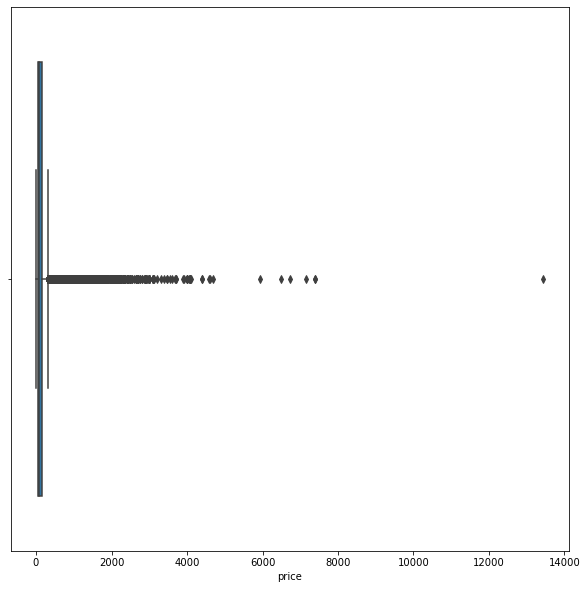

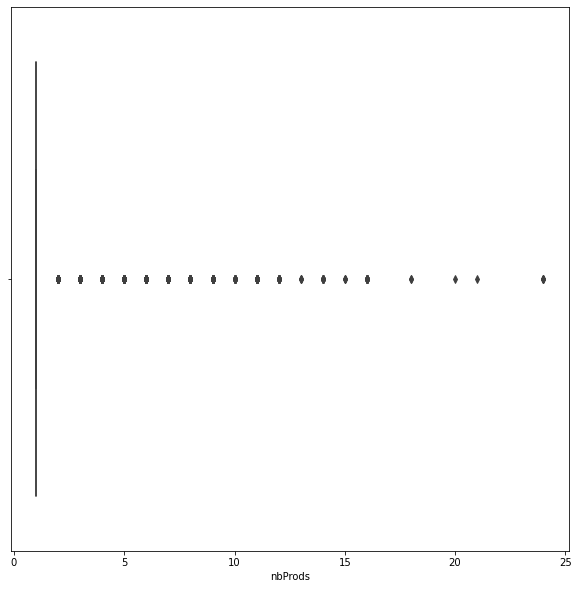

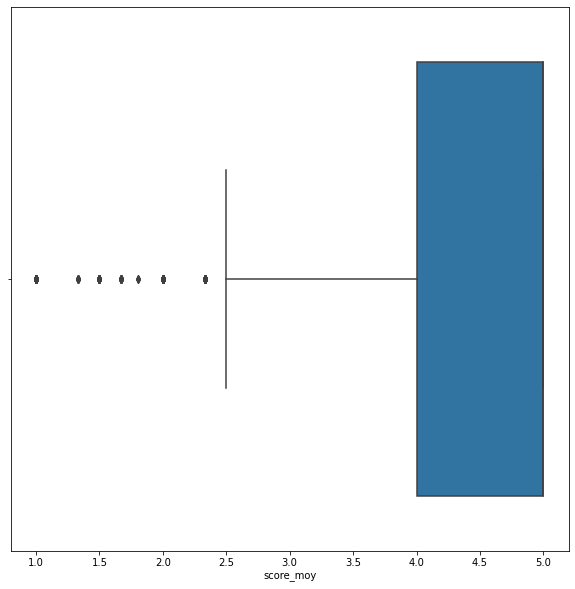

In [334]:
for col in data.select_dtypes(include = ['int64', 'float64']).columns:
    plt.figure(figsize=(10,10))
    sns.boxplot(data[col])
    plt.show()

In [259]:
data[data['price'] == data['price'].max()]

,customer_id,price,categorie,nbProds,paiement,score_moy,customer_state
8316,1617b1357756262bfa56ab541c47bc16,13440.0,electronics,8,credit_card,1.0,RJ


In [335]:
data[data['nbProds'] == data['nbProds'].max()]

,customer_unique_id,price,categorie,nbProds,paiement,score_moy,customer_state
75800,c8460e4251689ba205045f3ea17884a1,4080.0,electronics,24,credit_card,4.0,RS
75801,c8460e4251689ba205045f3ea17884a1,4080.0,electronics,24,credit_card,4.0,RS
75802,c8460e4251689ba205045f3ea17884a1,4080.0,electronics,24,credit_card,4.0,RS
75803,c8460e4251689ba205045f3ea17884a1,4080.0,electronics,24,credit_card,4.0,RS


In [265]:
products[products['product_id'] == '5769ef0a239114ac3a854af00df129e4']

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
25620,5769ef0a239114ac3a854af00df129e4,telefonia_fixa,39.0,2493.0,3.0,750.0,16.0,16.0,16.0


In [81]:
dict_categories = {
#maison (meubles et deco)
'furniture_living_room' : 'home',
'furniture_mattress_and_upholstery' : 'home',
'furniture_bedroom' : 'home',
'furniture_decor' : 'home',
'bed_bath_table' : 'home',
'kitchen_dining_laundry_garden_furniture' : 'home',
'la_cuisine' : 'home',
'home_confort' : 'home',
'home_comfort_2' : 'home',
'christmas_supplies' : 'home',
    
#articles ménagers 
'small_appliances' : 'appliances',
'small_appliances_home_oven_and_coffee' : 'appliances',
'home_appliances_2' : 'appliances',
'home_appliances' : 'appliances',
'housewares' : 'appliances',
    
#maison / bricolage
'construction_tools_construction': 'construction',
'costruction_tools_garden': 'construction',
'costruction_tools_tools': 'construction',
'construction_tools_safety': 'construction',
'construction_tools_lights': 'construction',
'home_construction': 'construction',
'air_conditioning': 'construction',
    
#bureau 
'office_furniture' : 'office',
'industry_commerce_and_business' : 'office',
'stationery' : 'office',
'agro_industry_and_commerce' : 'office',
'signaling_and_security' : 'office',
'furnitures' : 'office',
'security_and_services' : 'office',
    
#electronique
'telephony' : 'electronics',
'electronics': 'electronics',
'computers_accessories': 'electronics',
'consoles_games': 'electronics',
'fixed_telephony': 'electronics',
'audio': 'electronics',
'computers': 'electronics',
'tablets_printing_image': 'electronics',
    
# loisirs sportif
'sports_leisure' : 'sports_leisure',
'musical_instruments': 'sports_leisure',
'party_supplies': 'sports_leisure',
'luggage_accessories': 'sports_leisure',
    
# culture
'books' : 'arts',
'books_imported': 'arts',
'books_general_interest': 'arts',
'books_technical': 'arts',
'art': 'arts',
'toys': 'arts',
'cine_photo': 'arts',
'cds_dvds_musicals': 'arts',
'music': 'arts',
'dvds_blu_ray': 'arts',
'arts_and_craftmanship': 'arts',
    
# mode
'watches_gifts' : 'fashion',
'fashion_bags_accessories' : 'fashion',
'fashion_underwear_beach' : 'fashion',
'fashion_shoes' : 'fashion', 
'fashion_male_clothing' : 'fashion',
'fashio_female_clothing' : 'fashion',
'fashion_sport' : 'fashion',
'fashion_childrens_clothes' : 'fashion',
    
# parapharmacie
'health_beauty' : 'health_beauty', 
'baby': 'health_beauty',
'diapers_and_hygiene' : 'health_beauty',
'perfumery' : 'health_beauty',
    
#jardin/fleurs
'flowers' : 'garden',
'garden_tools' : 'garden',
    
# animaux domestiques
'pet_shop' : 'pets',
#auto 
'auto' : 'auto',
    
# alimentation
'food_drink' : 'food_drinks',
'food' : 'food_drinks',
'drinks' : 'food_drinks',
    
# indeterminé
'Unknown' : 'other',
'market_place' : 'other', 
'cool_stuff' : 'other'}

 ## Code

In [20]:
customers = pd.read_csv('C:\\Users\\Nordine\\Documents\\Projet5-Openclassrooms-master\\Projet5-Openclassrooms-master\\olist_customers_dataset.csv')
geolocalisation = pd.read_csv('C:\\Users\\Nordine\\Documents\\Projet5-Openclassrooms-master\\Projet5-Openclassrooms-master\\olist_geolocation_dataset.csv')
order_items = pd.read_csv('C:\\Users\\Nordine\\Documents\\Projet5-Openclassrooms-master\\Projet5-Openclassrooms-master\\olist_order_items_dataset.csv')
order_payments = pd.read_csv('C:\\Users\\Nordine\\Documents\\Projet5-Openclassrooms-master\\Projet5-Openclassrooms-master\\olist_order_payments_dataset.csv')
order_reviews = pd.read_csv('C:\\Users\\Nordine\\Documents\\Projet5-Openclassrooms-master\\Projet5-Openclassrooms-master\\olist_order_reviews_dataset.csv')
orders = pd.read_csv('C:\\Users\\Nordine\\Documents\\Projet5-Openclassrooms-master\\Projet5-Openclassrooms-master\\olist_orders_dataset.csv')
products = pd.read_csv('C:\\Users\\Nordine\\Documents\\Projet5-Openclassrooms-master\\Projet5-Openclassrooms-master\\olist_products_dataset.csv')
sellers = pd.read_csv('C:\\Users\\Nordine\\Documents\\Projet5-Openclassrooms-master\\Projet5-Openclassrooms-master\\olist_sellers_dataset.csv')
translation = pd.read_csv('C:\\Users\\Nordine\\Documents\\Projet5-Openclassrooms-master\\Projet5-Openclassrooms-master\\product_category_name_translation.csv')
customers = customers.sample(4000)
dict_categories = {
#maison (meubles et deco)
'furniture_living_room' : 'home',
'furniture_mattress_and_upholstery' : 'home',
'furniture_bedroom' : 'home',
'furniture_decor' : 'home',
'bed_bath_table' : 'home',
'kitchen_dining_laundry_garden_furniture' : 'home',
'la_cuisine' : 'home',
'home_confort' : 'home',
'home_comfort_2' : 'home',
'christmas_supplies' : 'home',
    
#articles ménagers 
'small_appliances' : 'appliances',
'small_appliances_home_oven_and_coffee' : 'appliances',
'home_appliances_2' : 'appliances',
'home_appliances' : 'appliances',
'housewares' : 'appliances',
    
#maison / bricolage
'construction_tools_construction': 'construction',
'costruction_tools_garden': 'construction',
'costruction_tools_tools': 'construction',
'construction_tools_safety': 'construction',
'construction_tools_lights': 'construction',
'home_construction': 'construction',
'air_conditioning': 'construction',
    
#bureau 
'office_furniture' : 'office',
'industry_commerce_and_business' : 'office',
'stationery' : 'office',
'agro_industry_and_commerce' : 'office',
'signaling_and_security' : 'office',
'furnitures' : 'office',
'security_and_services' : 'office',
    
#electronique
'telephony' : 'electronics',
'electronics': 'electronics',
'computers_accessories': 'electronics',
'consoles_games': 'electronics',
'fixed_telephony': 'electronics',
'audio': 'electronics',
'computers': 'electronics',
'tablets_printing_image': 'electronics',
    
# loisirs sportif
'sports_leisure' : 'sports_leisure',
'musical_instruments': 'sports_leisure',
'party_supplies': 'sports_leisure',
'luggage_accessories': 'sports_leisure',
    
# culture
'books' : 'arts',
'books_imported': 'arts',
'books_general_interest': 'arts',
'books_technical': 'arts',
'art': 'arts',
'toys': 'arts',
'cine_photo': 'arts',
'cds_dvds_musicals': 'arts',
'music': 'arts',
'dvds_blu_ray': 'arts',
'arts_and_craftmanship': 'arts',
    
# mode
'watches_gifts' : 'fashion',
'fashion_bags_accessories' : 'fashion',
'fashion_underwear_beach' : 'fashion',
'fashion_shoes' : 'fashion', 
'fashion_male_clothing' : 'fashion',
'fashio_female_clothing' : 'fashion',
'fashion_sport' : 'fashion',
'fashion_childrens_clothes' : 'fashion',
    
# parapharmacie
'health_beauty' : 'health_beauty', 
'baby': 'health_beauty',
'diapers_and_hygiene' : 'health_beauty',
'perfumery' : 'health_beauty',
    
#jardin/fleurs
'flowers' : 'garden',
'garden_tools' : 'garden',
    
# animaux domestiques
'pet_shop' : 'pets',
#auto 
'auto' : 'auto',
    
# alimentation
'food_drink' : 'food_drinks',
'food' : 'food_drinks',
'drinks' : 'food_drinks',
    
# indeterminé
'Unknown' : 'other',
'market_place' : 'other', 
'cool_stuff' : 'other'}

def r_score(x):
    if x <= quintiles['Recency'][.2]:
        return 5
    elif x <= quintiles['Recency'][.4]:
        return 4
    elif x <= quintiles['Recency'][.6]:
        return 3
    elif x <= quintiles['Recency'][.8]:
        return 2
    else:
        return 1

def fm_score(x, c):
    if x <= quintiles[c][.2]:
        return 1
    elif x <= quintiles[c][.4]:
        return 2
    elif x <= quintiles[c][.6]:
        return 3
    elif x <= quintiles[c][.8]:
        return 4
    else:
        return 5  

def redefine_date(orders, order_items):
    order_items['shipping_limit_date'] = order_items[
        'shipping_limit_date'].astype('datetime64')
    orders['order_purchase_timestamp'] = orders[
        'order_purchase_timestamp'].astype('datetime64')
    orders['order_approved_at'] = pd.to_datetime(orders[
        'order_approved_at'], errors='coerce')
    orders['order_delivered_carrier_date'] = pd.to_datetime(
        orders['order_delivered_carrier_date'], errors='coerce')
    orders['order_delivered_customer_date'] = pd.to_datetime(
        orders['order_delivered_customer_date'], errors='coerce')
    orders['order_estimated_delivery_date'] = orders[
        'order_estimated_delivery_date'].astype('datetime64')
    return orders, order_items
    
def categorize_datas(liste_df):
    for df, name in liste_df:
        for column in df.columns:              
            if df[column].nunique() < 50:
                df[column] = df[column].astype('category')
                
def feature_selection(customers, order_items, order_payments, order_reviews, orders, products, sellers):               
    customers = customers[['customer_state','customer_id', 'customer_unique_id']]
    order_items.drop(columns=['freight_value'], inplace=True)
    order_payments.drop(columns=['payment_sequential', 'payment_installments'], inplace=True)
    order_reviews = order_reviews[['order_id', 'review_score']]
    orders = orders[['order_id', 'customer_id', 'order_delivered_customer_date', 'order_purchase_timestamp']]
    products = pd.merge(products, translation)[['product_id', 'product_category_name_english']]
    sellers = sellers[['seller_id', 'seller_state']]
    return customers, order_items, order_payments, order_reviews, orders, products, sellers


                
def clean_data(customers, geolocalisation, order_items, order_payments, order_reviews, orders, products, sellers, translation):
    redefine_date(orders, order_items)
    liste_df = [(customers, 'customers'), 
            (geolocalisation, 'geolocalisation'),
            (order_items, 'order_items'),
            (order_payments, 'order_payments'),
           (order_reviews, 'order_reviews'),
            (orders, 'orders'),
             (products, 'products'),
            (sellers, 'sellers'),
            (translation, 'translation')]
    categorize_datas(liste_df)
    geolocalisation = geolocalisation.drop_duplicates()
    customers, order_items, order_payments, order_reviews, orders, products, sellers = \
    feature_selection(customers, order_items, order_payments, order_reviews, orders, products, sellers)  
    ordersWithCustomers = pd.merge(orders, customers)
    
    NOW = orders['order_purchase_timestamp'].max() + timedelta(days=1)
    ordersWithCustomers['DaysSinceOrder'] = ordersWithCustomers['order_purchase_timestamp'].apply(lambda x: (NOW - x).days)
    aggr = {
        'DaysSinceOrder': lambda x: x.min(),  # the number of days since last order (Recency)
        'order_purchase_timestamp': lambda x: len([d for d in x if d >= NOW - timedelta(days=365)]), # the total number of orders in the last period (Frequency)
    }
    rfm = ordersWithCustomers.groupby('customer_unique_id').agg(aggr).reset_index()
    totAchatParClient = pd.merge(customers, pd.merge(order_items, orders[orders['order_purchase_timestamp'] > NOW - timedelta(days=365)])).groupby('customer_unique_id').sum().reset_index()[['customer_unique_id', 'price']]
    rfm = rfm.merge(totAchatParClient)
    rfm.rename(columns={'DaysSinceOrder': 'Recency', 'order_purchase_timestamp': 'Frequency', 'price' : 'Monetary'}, inplace=True)
    tqdm.pandas()
    quintiles = rfm[['Recency', 'Frequency', 'Monetary']].quantile([.2, .4, .6, .8]).to_dict()
    rfm['R_quartile'] = rfm['Recency'].progress_apply(lambda x: r_score(x))
    rfm['F_quartile'] = rfm['Frequency'].progress_apply(lambda x: fm_score(x, 'Frequency'))
    rfm['M_quartile'] = rfm['Monetary'].progress_apply(lambda x: fm_score(x, 'Monetary'))
    rfm['RFM_Segment'] = rfm.R_quartile.map(str)+rfm.F_quartile.map(str)+rfm.M_quartile.map(str)
    rfm['RFM_Score'] = rfm[['R_quartile','F_quartile','M_quartile']].sum(axis=1)    
    rfm['Monetary'] = np.log2(1 + rfm['Monetary'])
    produitsParClient = pd.merge(customers, pd.merge(orders, pd.merge(order_items, products)))
    produitsPlusAchetee = produitsParClient.groupby('customer_unique_id')['product_category_name_english'].agg(lambda x:x.value_counts().index[0]).reset_index(name='categorie')
    nbreProdParClients = pd.merge(customers, pd.merge(orders, order_items)).groupby('customer_unique_id')['product_id'].count().reset_index(name='nbProds')
    order_reviews['review_score'] = order_reviews['review_score'].astype('int32')
    score_moy = pd.merge(customers, pd.merge(orders, order_reviews)).groupby('customer_unique_id')['review_score'].mean().reset_index(name='score_moy')
    paiement = pd.merge(customers, pd.merge(orders, order_payments)).groupby('customer_unique_id')['payment_type'].agg(lambda x:x.value_counts().index[0]).reset_index(name='paiement')
    delai_delivery = pd.merge(orders, order_items)
    delai_delivery['Delai_livraison_Commande'] = delai_delivery['order_delivered_customer_date'] - delai_delivery[
       'order_purchase_timestamp']
    delai_delivery['Delai_livraison_Commande'] = delai_delivery['Delai_livraison_Commande'].dt.days
    delai_delivery['Delai_livraison_Commande'].fillna(-1, inplace=True)
    delai_delivery = pd.merge(customers[['customer_id', 'customer_unique_id']], delai_delivery[['customer_id', 'Delai_livraison_Commande' ]]).groupby('customer_unique_id').mean().reset_index()
    data = pd.merge(nbreProdParClients, produitsPlusAchetee).merge(paiement).merge(delai_delivery).merge(score_moy).merge(customers[['customer_unique_id', 'customer_state']][~customers['customer_unique_id'].duplicated()])
    data = pd.merge(data, rfm)
    data['categorie'] = data['categorie'].map(dict_categories)
    data['categorie'] = data['categorie'].astype('category')
    data['paiement'] = data['paiement'].astype('category')
    #data['nbProds'] = data.apply(categorise_nbProds, axis=1)
    #data['nbProds'] =  data['nbProds'].astype('category')    
    data['score_moy'] =  data['score_moy'].astype('category')
    #data['price'] = np.log2(1 + data['price'])
    return data
    
data = clean_data(customers, geolocalisation, order_items, order_payments, order_reviews, orders, products, sellers, translation)    
data['customer_unique_id'].duplicated().sum()
data.to_csv('C:\\Users\\Nordine\\OneDrive\\Documents\\Projet5-Openclassrooms-master\\cleaned_data.csv', index=False)

100%|██████████| 2826/2826 [00:00<00:00, 128498.67it/s]


In [21]:

data

,customer_unique_id,nbProds,categorie,paiement,Delai_livraison_Commande,score_moy,customer_state,Recency,Frequency,Monetary,R_quartile,F_quartile,M_quartile,RFM_Segment,RFM_Score
0,002d3bd901608f67c3fc11eaaa842b13,1,food_drinks,boleto,6.0,4.0,SP,275,1,4.356848,2,1,1,211,4
1,003d56767e53e08671de00da3fba8d40,1,home,credit_card,21.0,5.0,MG,321,1,7.303781,1,1,4,114,6
2,00c04df1c94e385d57d4a33a2965217c,1,electronics,boleto,15.0,5.0,MG,230,1,6.189825,3,1,3,313,7
3,00c3c74b09b2022ac2c0f43bb09797b4,1,health_beauty,credit_card,5.0,5.0,SP,321,1,5.855242,1,1,2,112,4
4,00c8c7f0cafacc30bfda2a9a7445ec80,1,home,boleto,20.0,5.0,RJ,82,1,6.087463,5,1,2,512,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2768,ff3d60787113593f975381dc8dc2a8e2,1,fashion,credit_card,3.0,5.0,SP,354,1,4.852998,1,1,1,111,3
2769,ffdd1e311843bb858885335ae77bb97a,1,health_beauty,credit_card,12.0,5.0,RJ,327,1,3.000000,1,1,1,111,3
2770,ffecceca389973ef16660d58696f281e,1,fashion,boleto,8.0,5.0,SP,176,1,5.928370,4,1,2,412,7
2771,fff1bdd5c5e37ca79dd74deeb91aa5b6,1,arts,debit_card,58.0,1.0,TO,235,1,7.086402,3,1,4,314,8


In [527]:
data.to_csv('C:\\Users\\Nordine\\OneDrive\\Documents\\Projet5-Openclassrooms-master\\cleaned_data.csv', index=False)

## Analyse univariée

### Variables numériques

In [426]:
data.dtypes

customer_unique_id            object
price                        float64
categorie                   category
nbProds                     category
paiement                    category
Delai_livraison_Commande     float64
score_moy                   category
customer_state              category
dtype: object

<Figure size 1440x1440 with 0 Axes>

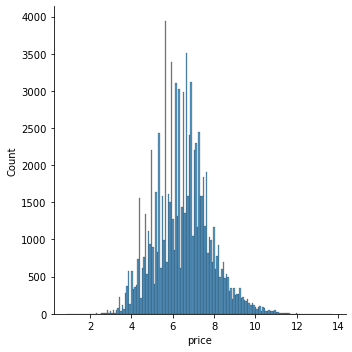

<Figure size 1440x1440 with 0 Axes>

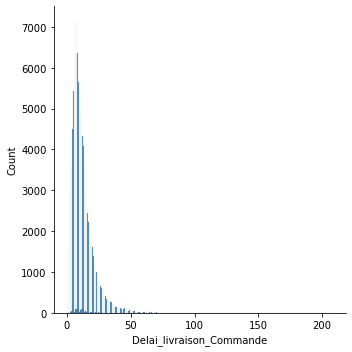

In [427]:
for col in data.select_dtypes(['float64','int64']).columns:
    plt.figure(figsize=(20,20))
    sns.displot(data[col])
    plt.show()

In [374]:
data.select_dtypes(['float64','int64']).columns

Index(['price', 'nbProds', 'score_moy'], dtype='object')

<Figure size 1440x1440 with 0 Axes>

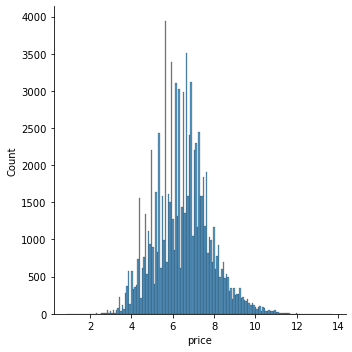

<Figure size 1440x1440 with 0 Axes>

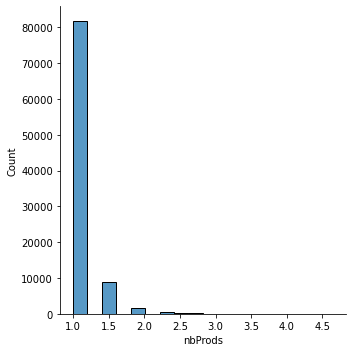

<Figure size 1440x1440 with 0 Axes>

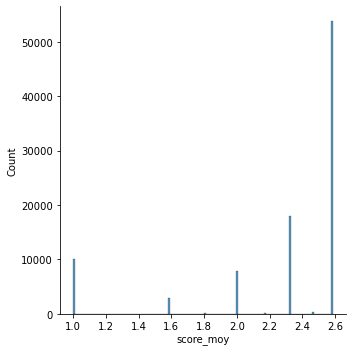

In [378]:
for col in data.select_dtypes(['float64','int64']).columns:
    plt.figure(figsize=(20,20))
    sns.displot(np.log2(1 + data[col]))
    plt.show()

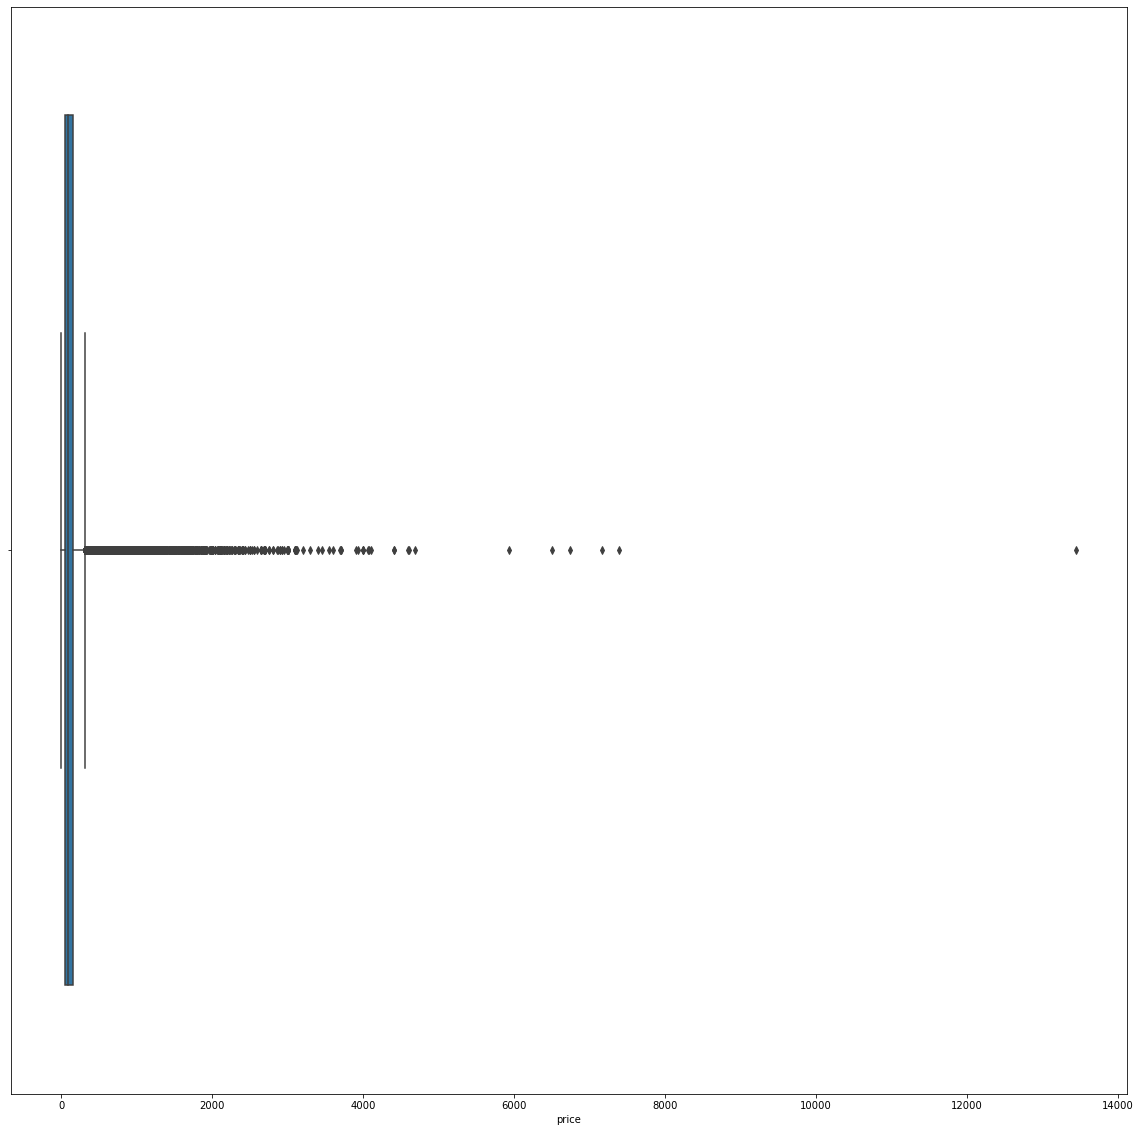

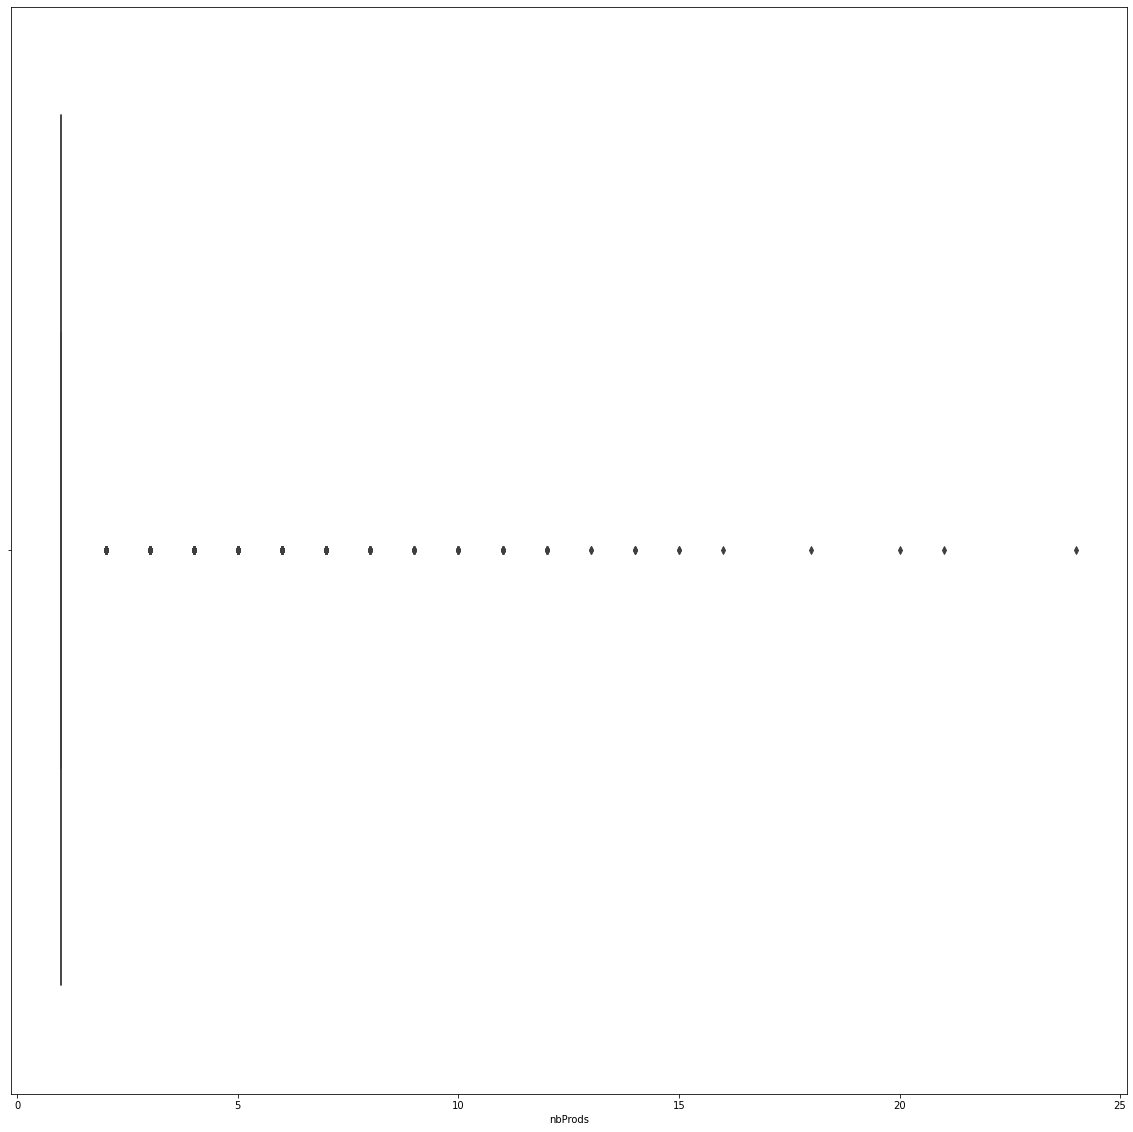

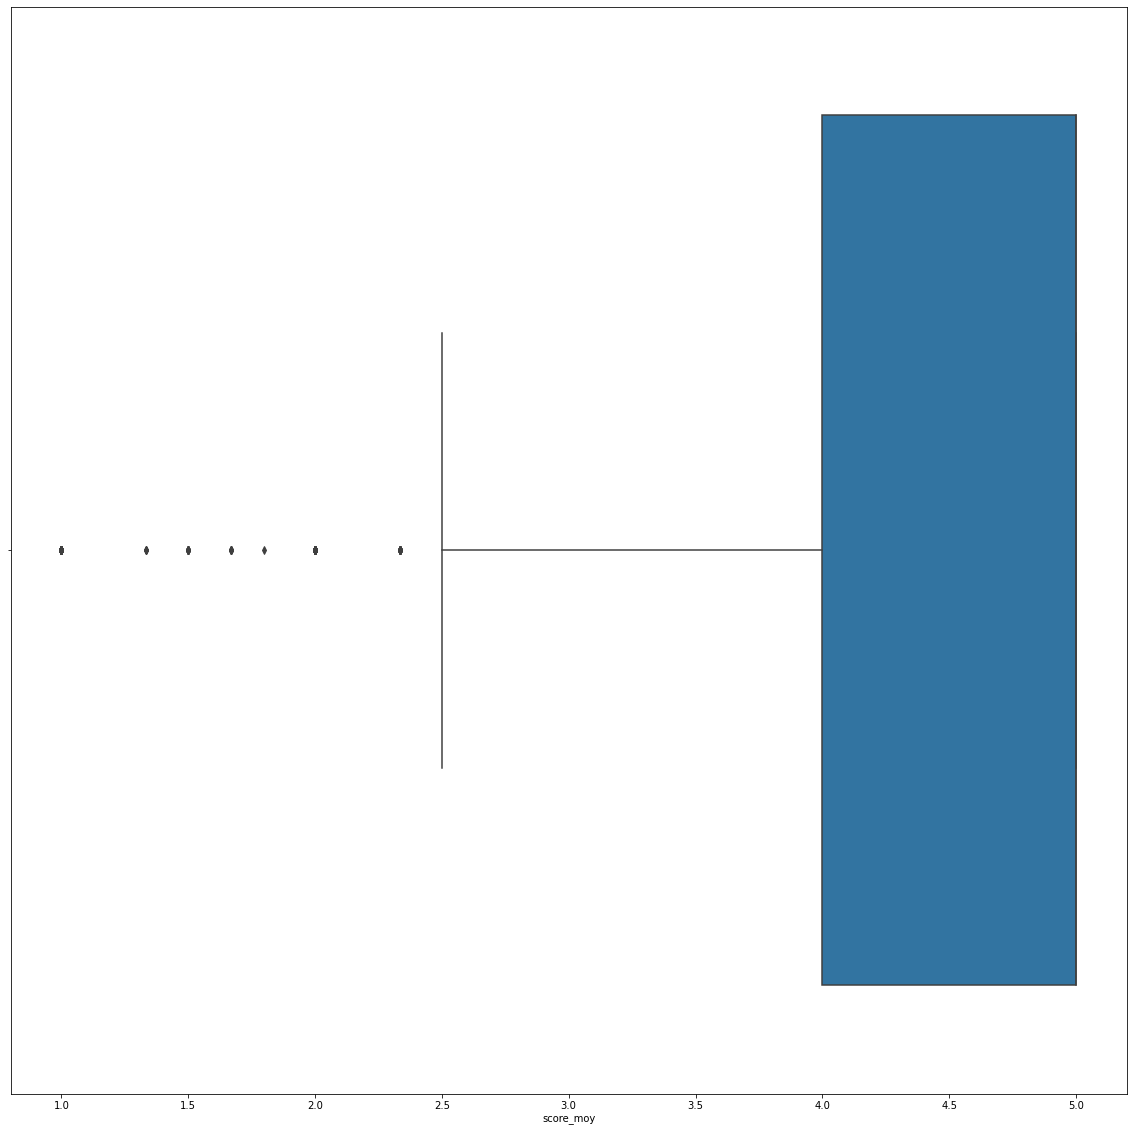

In [379]:
for col in data.select_dtypes(['float64','int64']).columns:
    plt.figure(figsize=(20,20))
    sns.boxplot(data[col])
    plt.show()

In [381]:
data['nbProds'].value_counts()

1     81738
2      8842
3      1639
4       621
5       250
6       190
7        46
8        16
10       11
11       11
9        11
12        9
14        3
13        2
15        2
16        1
18        1
20        1
21        1
24        1
Name: nbProds, dtype: int64

Finalement, on va convertir les colonnes nbProds et score_moy en catégories et on log transforme la colonne price pour la normaliser.

In [390]:
def categorise_nbProds(data):
    if data['nbProds'] == 1:
        return 0
    elif (data['nbProds'] > 1) & (data['nbProds'] <= 5):
        return 1
    elif (data['nbProds'] > 5) & (data['nbProds'] <= 10):
        return 2
    else:
        return 3
        
data['nbProds'] = data.apply(categorise_nbProds, axis=1)

In [391]:
data['nbProds'].value_counts()

0    81738
1    11352
2      274
3       32
Name: nbProds, dtype: int64

In [392]:
data['nbProds'] =  data['nbProds'].astype('category')
data['score_moy'] =  data['score_moy'].astype('category')

In [393]:
data['price'] = np.log2(1 + data['price'])

<Figure size 2160x2160 with 0 Axes>

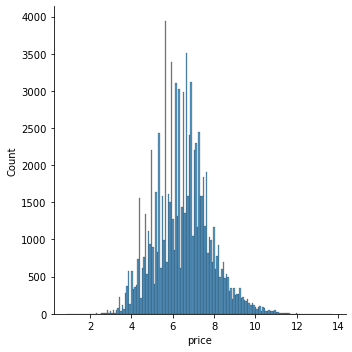

In [396]:
plt.figure(figsize=(30,30))
sns.displot(data['price'])
plt.show()

#### Variables catégorielles

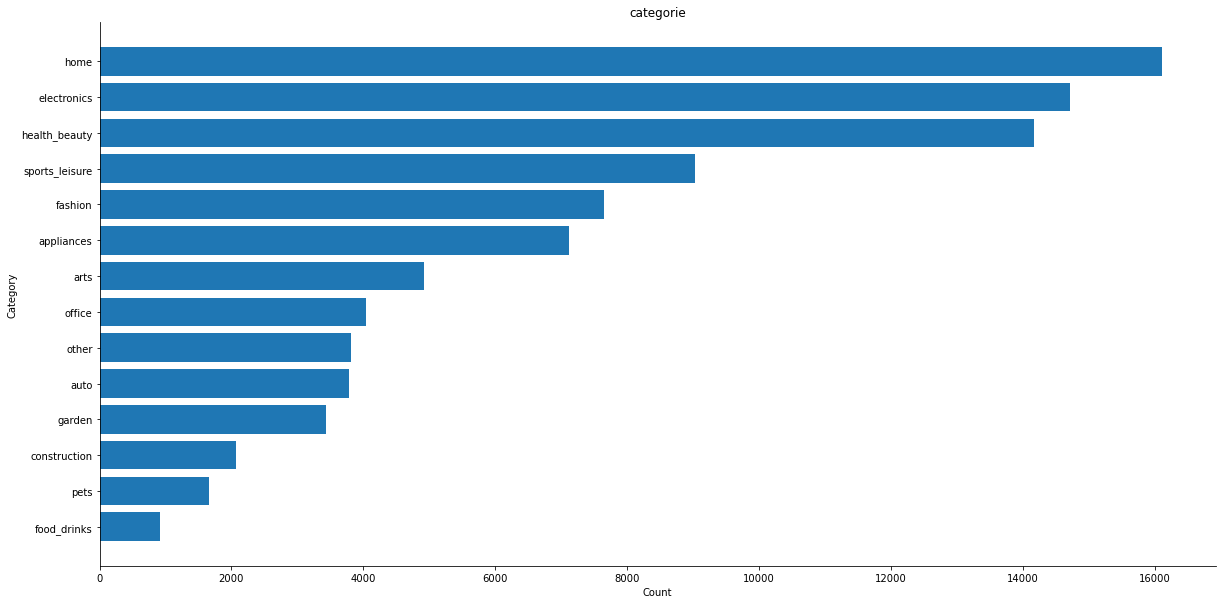

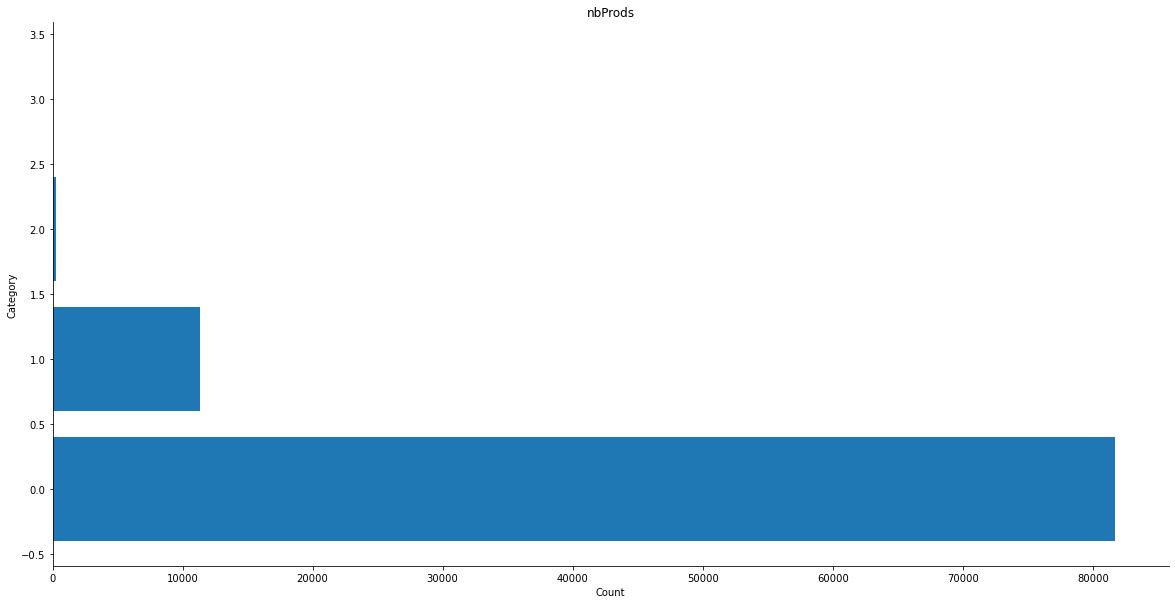

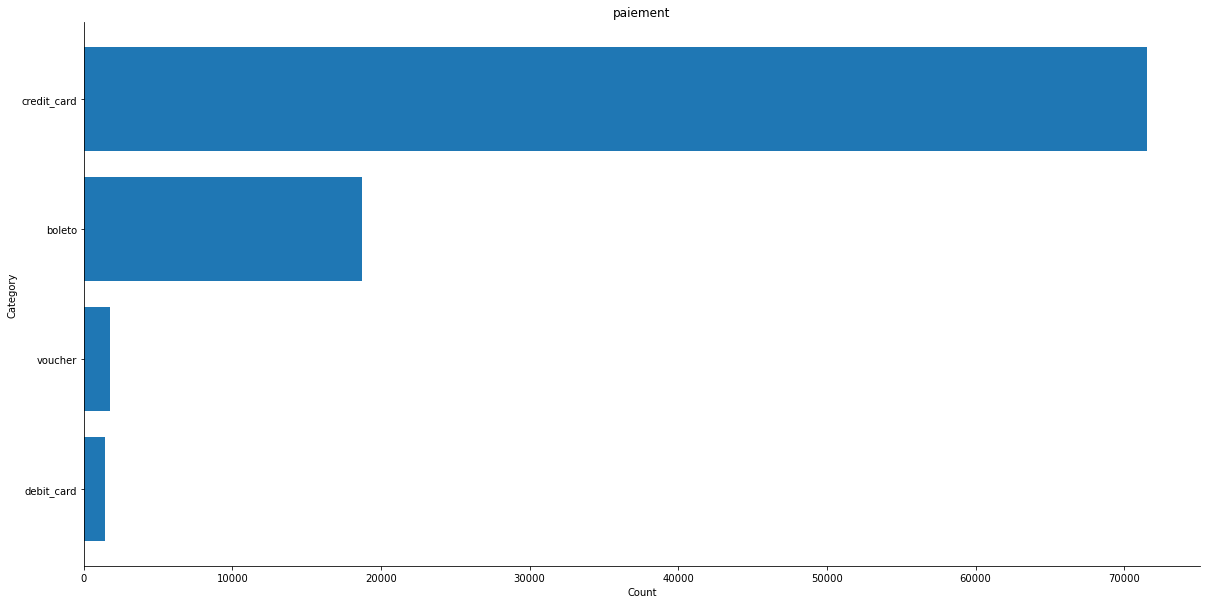

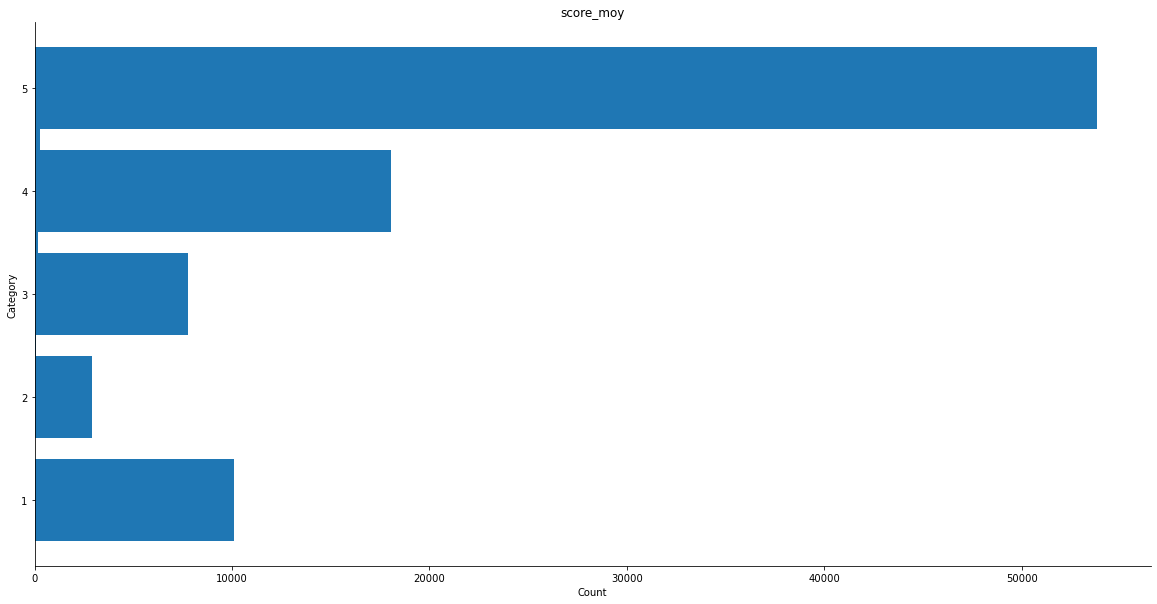

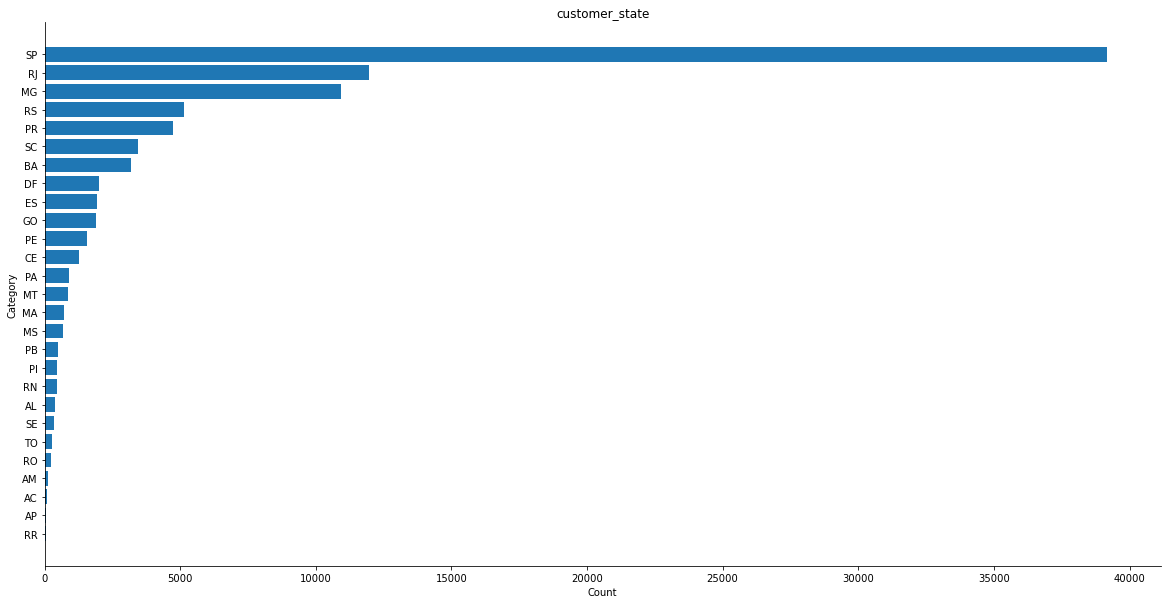

In [398]:
for col in data.select_dtypes(['category']).columns:
    plt.figure(figsize=(20,10))   
    plt.barh(width=data.groupby(col).count().reset_index()['customer_unique_id'].sort_values(), y = data.groupby(col)['customer_unique_id'].count().reset_index().sort_values(by = 'customer_unique_id')[col])
    plt.title(col)
    plt.xlabel('Count')
    plt.ylabel('Category')
    sns.despine()
    plt.show()